# Practical Reinforcement Learning

In [3]:
%pip install stable_baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [4]:
%pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00


In [5]:
%pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379372 sha256=a0415e809a496ad2efafaf87f9593a4b52c72dcd870663e333783b4447f966ec
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


In [6]:
%pip install gymnasium[atari]

In [7]:
%pip install ale-py

# Tasks

In this assignment you will apply several reinforcement learning techniques to practical applications.

## Task 1 - Q-learning on a simple environment

Apply the Q-learning algorithm (with epsilon-greedy strategy) to Gymnasium's Cliff Walking problem (use `CliffWalking-v0`). To learn the details of this problem, including the action space and the observation space, follow this link:

- https://gymnasium.farama.org/environments/toy_text/cliff_walking/

Your code output must include two plots that shows the result of applying two different choices of hyperparameters during learning. In particular, **every 500 steps** of the learning algorithm, each plot must show the accumulated reward of **1 new episode** that uses the learned policy after using the following hyperparameters:

- Epsilon decay rate = 0.001
- Epsilon decay rate = 0.005

You can decide the total number of steps needed for training. In order to obtain full marks, the plot must show that the trained model consistently achieves the top possible reward at the end of the training period.

Feel free to re-use an implementation of Q-learning by a third-party person (e.g. the code from this unit, or using a package such as [stable baselines 3](https://stable-baselines3.readthedocs.io/en/master/)), or machine (e.g. AI generated code). If re-using code or using AI-generated code, make sure that you acknowledge the source appropriately, make sure that the code is correct, and make sure that you know how to adapt it to this task.

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

### The Cliff Walking Environment
- 4x12 grid world with the agent starting at position (3,0)
- Goal is at position (3,11)
- Cliff runs along positions (3,1) to (3,10)
- Falling off cliff returns agent to start
- Reward: -1 per step, -100 for falling off cliff

### Implementation
The implementation compares two different **epsilon decay rates** (0.001 and 0.005) to observe how the exploration-exploitation trade-off affects learning performance. For each configuration:
1. Initialize a Q-table with zeros
2. Use epsilon-greedy strategy for action selection
3. Update Q-values using the Bellman equation
4. Evaluate the learned policy every 500 steps
5. Track and plot learning progress

In [2]:
def evaluate_policy(env, Q_table, num_episodes, max_steps):
    """
    Evaluates the current greedy policy for one episode.

    Args:
        env: gym.Env
            The Gymnasium environment for evaluation.
        Q_table: np.array
            The Q-table representing the learned policy.
        num_episodes: int
            Number of evaluation episodes.
        max_steps: int
            Maximum steps to run the evaluation episode.

    Returns:
        average_reward: float
            The average accumulated reward for the evaluation episode.
    """
    accumulated_reward = 0
    for _ in range(num_episodes):
        state, _ = env.reset()
        done = False
        truncated = False
        for _ in range(max_steps):
            action = np.argmax(Q_table[state, :])  # Greedy action (exploit)
            next_state, reward, done, truncated, _ = env.step(action)
            accumulated_reward += reward
            state = next_state
            if done or truncated:
                break

    average_reward = accumulated_reward / num_episodes
    return average_reward

In [3]:
def q_learning(total_training_steps, learning_rate, discount_factor,
                initial_epsilon, min_epsilon, epsilon_decay_rate, num_eval_episodes,
                eval_interval_steps, max_steps_per_train_episode,
                max_steps_per_eval_episode, eval_avg_window, env_name, verbose=True):
    """
    Applies the Q-learning algorithm to the specified environment.

    Args:
        total_training_steps: int
            Total number of steps to run the learning algorithm.
        learning_rate: float
            The learning rate (alpha).
        discount_factor: float
            The discount factor (gamma).
        initial_epsilon: float
            Initial epsilon value for epsilon-greedy strategy.
        min_epsilon: float
            Minimum epsilon value.
        epsilon_decay_rate: float
            The rate at which epsilon decays per episode.
        num_eval_episodes: int
            Number of evaluation episodes.
        eval_interval_steps: int
            Number of training steps between evaluations.
        max_steps_per_train_episode: int
            Max steps per training episode before truncation.
        max_steps_per_eval_episode: int
            Max steps per evaluation episode.
        eval_avg_window: int
            Window for moving average of validation rewards.
        env_name: str
            Name(ID) of the Gymnasium environment.
        verbose: bool
            Whether to print progress
    Returns:
        tuple: (eval_steps_history, eval_rewards_history, train_avg_rewards_history, Q_table)
               eval_steps_history: List of training steps at which evaluation was done.
               eval_rewards_history: List of accumulated rewards from evaluation episodes.
               train_avg_rewards_history: List of average of rewards from evaluation episodes.
               Q_table: The learned Q-table.
    """
    train_env = gym.make(env_name)
    eval_env = gym.make(env_name) # Separate environment for evaluation

    num_states = train_env.observation_space.n
    num_actions = train_env.action_space.n
    Q = np.zeros((num_states, num_actions))

    epsilon = initial_epsilon

    # Lists for storing evaluation results
    eval_rewards_history = []       # For validation curve (raw greedy eval)
    eval_steps_history = []         # Steps as x-axis for plots
    train_avg_rewards_history = []  # For training curve (averaged to make it smooth)

    current_total_steps = 0
    episodes_completed = 0

    state, _ = train_env.reset()
    current_episode_steps = 0
    next_evaluation_steps = 0

    print(f"\n{'='*100}")
    print(f"Starting training with epsilon_decay_rate: {epsilon_decay_rate}")
    print(f"{'='*100}\n")
    start_time = time.time()
    with tqdm(total=total_training_steps, desc=f'Training (epsilon_decay_rate={epsilon_decay_rate})') as pbar:
        while current_total_steps < total_training_steps:
            # === Evaluation Phase ===
            # Perform evaluation if current_total_steps has reached or passed the next evaluation steps
            if current_total_steps >= next_evaluation_steps:
                # Calculate Validation Reward (greedy policy)
                eval_reward = evaluate_policy(eval_env, Q, num_eval_episodes, max_steps_per_eval_episode)
                eval_rewards_history.append(eval_reward)

                # Calculate Average Validation Reward for the "Training" curve
                if len(eval_rewards_history) > 0:
                    # Average rewards from the current validation history up to the smoothing window size
                    window_to_average = eval_rewards_history[-eval_avg_window:]
                    train_avg_rewards_history.append(np.mean(window_to_average))
                else: # Should not happen if evaluation starts at step 0
                    train_avg_rewards_history.append(np.nan)

                eval_steps_history.append(next_evaluation_steps)

                if verbose:
                    print(f"\nSteps: {current_total_steps}, Evaluation Reward: {eval_reward}.")

                next_evaluation_steps += eval_interval_steps

            # === Training Phase ===
            # Epsilon-greedy action selection
            if np.random.uniform(0, 1) < epsilon:
                action = train_env.action_space.sample()  # Explore - random action
            else:
                action = np.argmax(Q[state, :])     # Exploit - greedy action

            next_state, reward, done, truncated, _ = train_env.step(action)

            # Q-value update using Bellman equation
            # Q(s,a) = Q(s,a) + α * [r + γ * max_a' Q(s',a') - Q(s,a)]
            Q[state, action] = Q[state, action] + learning_rate * \
                (reward + discount_factor * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state
            current_total_steps += 1
            current_episode_steps += 1
            pbar.update(1)

            # Check if episode ended (done, truncated, or max steps for episode reached)
            if done or truncated or current_episode_steps >= max_steps_per_train_episode:
                state, _ = train_env.reset()
                episodes_completed += 1
                current_episode_steps = 0
                # Decay epsilon based on the number of completed episodes
                epsilon = min_epsilon + (initial_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episodes_completed)
                epsilon = max(min_epsilon, epsilon) # Ensure epsilon does not go below min_epsilon

    # === Final Evaluation at the end of total_training_steps ===
    # Ensure data for total_training_steps is captured if not already by the loop's evaluation schedule
    if not eval_steps_history or eval_steps_history[-1] < total_training_steps:
        final_eval_reward = evaluate_policy(eval_env, Q, num_eval_episodes, max_steps_per_eval_episode)
        eval_rewards_history.append(final_eval_reward)

        # Calculate Average Validation Reward for the "Training" curve
        if len(eval_rewards_history) > 0:
            # Average rewards from the current validation history up to the smoothing window size
            window_to_average = eval_rewards_history[-eval_avg_window:]
            train_avg_rewards_history.append(np.mean(window_to_average))
        else: # Should not happen if evaluation starts at step 0
            train_avg_rewards_history.append(np.nan)

        eval_steps_history.append(total_training_steps)
        if verbose:
            print(f"Steps: {total_training_steps}, Final Evaluation Reward: {final_eval_reward}.")
    elif eval_steps_history and eval_steps_history[-1] == total_training_steps and len(eval_rewards_history) < len(eval_steps_history) :
        """
            This case can happen if the loop ended exactly on an evaluation steps
            but the evaluation was for the *start* of that steps.
            We essentially re-evaluate update the last point for accuracy or ensure
            the last recorded eval corresponds to the Q-table *after* total_training_steps
            eval_rewards_history[-1] = evaluate_policy(eval_env, Q, num_eval_episodes, max_steps_per_eval_episode)
            window_to_average = eval_rewards_history[-eval_avg_window:]
            train_avg_rewards_history[-1] = np.mean(window_to_average)
        """

    training_time = time.time() - start_time
    print(f"""Training for epsilon_decay_rate: {epsilon_decay_rate} completed in {training_time}s.\n
    Total steps: {current_total_steps} | Episodes: {episodes_completed}""")
    train_env.close()
    eval_env.close()

    return eval_steps_history, eval_rewards_history, train_avg_rewards_history, Q


Starting training with epsilon_decay_rate: 0.001



Training (epsilon_decay_rate=0.001):   1%|          | 501/60000 [00:00<00:21, 2730.93it/s]


Steps: 0, Evaluation Reward: -100.0.

Steps: 500, Evaluation Reward: -100.0.

Steps: 1000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):   3%|▎         | 2001/60000 [00:00<00:12, 4639.92it/s]


Steps: 1500, Evaluation Reward: -100.0.

Steps: 2000, Evaluation Reward: -100.0.

Steps: 2500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):   5%|▌         | 3001/60000 [00:00<00:10, 5182.40it/s]


Steps: 3000, Evaluation Reward: -1288.0.

Steps: 3500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):   7%|▋         | 4001/60000 [00:00<00:10, 5565.75it/s]


Steps: 4000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):   8%|▊         | 4556/60000 [00:00<00:10, 5496.58it/s]


Steps: 4500, Evaluation Reward: -100.0.

Steps: 5000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):   9%|▉         | 5501/60000 [00:01<00:09, 5622.87it/s]


Steps: 5500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  11%|█         | 6736/60000 [00:01<00:09, 5901.21it/s]


Steps: 6000, Evaluation Reward: -100.0.

Steps: 6500, Evaluation Reward: -100.0.

Steps: 7000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  13%|█▎        | 7501/60000 [00:01<00:09, 5517.99it/s]


Steps: 7500, Evaluation Reward: -100.0.

Steps: 8000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  14%|█▍        | 8501/60000 [00:01<00:08, 5746.78it/s]


Steps: 8500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  16%|█▌        | 9501/60000 [00:01<00:08, 5967.83it/s]


Steps: 9000, Evaluation Reward: -100.0.

Steps: 9500, Evaluation Reward: -100.0.

Steps: 10000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  18%|█▊        | 10501/60000 [00:01<00:08, 6077.50it/s]


Steps: 10500, Evaluation Reward: -100.0.

Steps: 11000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  19%|█▉        | 11501/60000 [00:02<00:07, 6113.99it/s]


Steps: 11500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  21%|██        | 12501/60000 [00:02<00:07, 6142.39it/s]


Steps: 12000, Evaluation Reward: -100.0.

Steps: 12500, Evaluation Reward: -100.0.

Steps: 13000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  23%|██▎       | 13501/60000 [00:02<00:08, 5478.94it/s]


Steps: 13500, Evaluation Reward: -100.0.

Steps: 14000, Evaluation Reward: -13.0.

Steps: 14500, Evaluation Reward: -13.0.

Steps: 15000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  26%|██▌       | 15501/60000 [00:02<00:05, 7675.17it/s]


Steps: 15500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.001):  27%|██▋       | 16316/60000 [00:02<00:05, 7687.39it/s]


Steps: 16000, Evaluation Reward: -100.0.

Steps: 16500, Evaluation Reward: -13.0.

Steps: 17000, Evaluation Reward: -13.0.

Steps: 17500, Evaluation Reward: -13.0.

Steps: 18000, Evaluation Reward: -13.0.

Steps: 18500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  31%|███       | 18501/60000 [00:02<00:03, 10711.86it/s]


Steps: 19000, Evaluation Reward: -13.0.

Steps: 19500, Evaluation Reward: -13.0.

Steps: 20000, Evaluation Reward: -13.0.

Steps: 20500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  39%|███▊      | 23200/60000 [00:02<00:02, 16384.38it/s]


Steps: 21000, Evaluation Reward: -13.0.

Steps: 21500, Evaluation Reward: -13.0.

Steps: 22000, Evaluation Reward: -13.0.

Steps: 22500, Evaluation Reward: -13.0.

Steps: 23000, Evaluation Reward: -13.0.

Steps: 23500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  43%|████▎     | 26001/60000 [00:03<00:01, 19384.27it/s]


Steps: 24000, Evaluation Reward: -13.0.

Steps: 24500, Evaluation Reward: -13.0.

Steps: 25000, Evaluation Reward: -13.0.

Steps: 25500, Evaluation Reward: -13.0.

Steps: 26000, Evaluation Reward: -13.0.

Steps: 26500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  48%|████▊     | 29001/60000 [00:03<00:01, 22083.20it/s]


Steps: 27000, Evaluation Reward: -13.0.

Steps: 27500, Evaluation Reward: -13.0.

Steps: 28000, Evaluation Reward: -13.0.

Steps: 28500, Evaluation Reward: -13.0.

Steps: 29000, Evaluation Reward: -13.0.

Steps: 29500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  52%|█████▏    | 31454/60000 [00:03<00:01, 22768.66it/s]


Steps: 30000, Evaluation Reward: -13.0.

Steps: 30500, Evaluation Reward: -13.0.

Steps: 31000, Evaluation Reward: -13.0.

Steps: 31500, Evaluation Reward: -13.0.

Steps: 32000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  56%|█████▋    | 33815/60000 [00:03<00:01, 22119.40it/s]


Steps: 32500, Evaluation Reward: -13.0.

Steps: 33000, Evaluation Reward: -13.0.

Steps: 33500, Evaluation Reward: -13.0.

Steps: 34000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  60%|██████    | 36089/60000 [00:03<00:01, 22286.28it/s]


Steps: 34500, Evaluation Reward: -13.0.

Steps: 35000, Evaluation Reward: -13.0.

Steps: 35500, Evaluation Reward: -13.0.

Steps: 36000, Evaluation Reward: -13.0.

Steps: 36500, Evaluation Reward: -13.0.

Steps: 37000, Evaluation Reward: -13.0.

Steps: 37500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  64%|██████▍   | 38501/60000 [00:03<00:00, 22430.47it/s]


Steps: 38000, Evaluation Reward: -13.0.

Steps: 38500, Evaluation Reward: -13.0.

Steps: 39000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  68%|██████▊   | 41001/60000 [00:03<00:00, 22528.09it/s]


Steps: 39500, Evaluation Reward: -13.0.

Steps: 40000, Evaluation Reward: -13.0.

Steps: 40500, Evaluation Reward: -13.0.

Steps: 41000, Evaluation Reward: -13.0.

Steps: 41500, Evaluation Reward: -13.0.

Steps: 42000, Evaluation Reward: -13.0.

Steps: 42500, Evaluation Reward: -13.0.

Steps: 43000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  73%|███████▎  | 43501/60000 [00:03<00:00, 22073.59it/s]


Steps: 43500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  78%|███████▊  | 46501/60000 [00:03<00:00, 23805.78it/s]


Steps: 44000, Evaluation Reward: -13.0.

Steps: 44500, Evaluation Reward: -13.0.

Steps: 45000, Evaluation Reward: -13.0.

Steps: 45500, Evaluation Reward: -13.0.

Steps: 46000, Evaluation Reward: -13.0.

Steps: 46500, Evaluation Reward: -13.0.

Steps: 47000, Evaluation Reward: -13.0.

Steps: 47500, Evaluation Reward: -13.0.

Steps: 48000, Evaluation Reward: -13.0.

Steps: 48500, Evaluation Reward: -13.0.

Steps: 49000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  83%|████████▎ | 49501/60000 [00:04<00:00, 25341.22it/s]


Steps: 49500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001):  93%|█████████▎| 55501/60000 [00:04<00:00, 27093.51it/s]


Steps: 50000, Evaluation Reward: -13.0.

Steps: 50500, Evaluation Reward: -13.0.

Steps: 51000, Evaluation Reward: -13.0.

Steps: 51500, Evaluation Reward: -13.0.

Steps: 52000, Evaluation Reward: -13.0.

Steps: 52500, Evaluation Reward: -13.0.

Steps: 53000, Evaluation Reward: -13.0.

Steps: 53500, Evaluation Reward: -13.0.

Steps: 54000, Evaluation Reward: -13.0.

Steps: 54500, Evaluation Reward: -13.0.

Steps: 55000, Evaluation Reward: -13.0.

Steps: 55500, Evaluation Reward: -13.0.

Steps: 56000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.001): 100%|██████████| 60000/60000 [00:04<00:00, 13516.82it/s]



Steps: 56500, Evaluation Reward: -13.0.

Steps: 57000, Evaluation Reward: -13.0.

Steps: 57500, Evaluation Reward: -13.0.

Steps: 58000, Evaluation Reward: -13.0.

Steps: 58500, Evaluation Reward: -13.0.

Steps: 59000, Evaluation Reward: -13.0.

Steps: 59500, Evaluation Reward: -13.0.
Steps: 60000, Final Evaluation Reward: -13.0.
Training for epsilon_decay_rate: 0.001 completed in 4.451555013656616s.

    Total steps: 60000 | Episodes: 902

Starting training with epsilon_decay_rate: 0.005



Training (epsilon_decay_rate=0.005):   0%|          | 0/60000 [00:00<?, ?it/s]


Steps: 0, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.005):   1%|          | 501/60000 [00:00<00:23, 2547.78it/s]


Steps: 500, Evaluation Reward: -100.0.

Steps: 1000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.005):   3%|▎         | 1501/60000 [00:00<00:12, 4535.66it/s]


Steps: 1500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.005):   4%|▍         | 2501/60000 [00:00<00:11, 5186.12it/s]


Steps: 2000, Evaluation Reward: -1189.0.

Steps: 2500, Evaluation Reward: -1189.0.


Training (epsilon_decay_rate=0.005):   5%|▌         | 3032/60000 [00:00<00:11, 5085.61it/s]


Steps: 3000, Evaluation Reward: -1189.0.


Training (epsilon_decay_rate=0.005):   7%|▋         | 4001/60000 [00:00<00:10, 5485.45it/s]


Steps: 3500, Evaluation Reward: -100.0.

Steps: 4000, Evaluation Reward: -100.0.

Steps: 4500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.005):   8%|▊         | 5001/60000 [00:00<00:09, 5814.66it/s]


Steps: 5000, Evaluation Reward: -100.0.

Steps: 5500, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.005):  10%|█         | 6001/60000 [00:01<00:09, 5645.42it/s]


Steps: 6000, Evaluation Reward: -100.0.


Training (epsilon_decay_rate=0.005):  16%|█▌        | 9501/60000 [00:01<00:04, 10876.14it/s]


Steps: 6500, Evaluation Reward: -15.0.

Steps: 7000, Evaluation Reward: -100.0.

Steps: 7500, Evaluation Reward: -13.0.

Steps: 8000, Evaluation Reward: -13.0.

Steps: 8500, Evaluation Reward: -13.0.

Steps: 9000, Evaluation Reward: -13.0.

Steps: 9500, Evaluation Reward: -13.0.

Steps: 10000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  25%|██▌       | 15001/60000 [00:01<00:02, 17748.57it/s]


Steps: 10500, Evaluation Reward: -13.0.

Steps: 11000, Evaluation Reward: -13.0.

Steps: 11500, Evaluation Reward: -13.0.

Steps: 12000, Evaluation Reward: -13.0.

Steps: 12500, Evaluation Reward: -13.0.

Steps: 13000, Evaluation Reward: -13.0.

Steps: 13500, Evaluation Reward: -13.0.

Steps: 14000, Evaluation Reward: -13.0.

Steps: 14500, Evaluation Reward: -13.0.

Steps: 15000, Evaluation Reward: -13.0.

Steps: 15500, Evaluation Reward: -13.0.

Steps: 16000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  35%|███▌      | 21001/60000 [00:01<00:01, 22659.94it/s]


Steps: 16500, Evaluation Reward: -13.0.

Steps: 17000, Evaluation Reward: -13.0.

Steps: 17500, Evaluation Reward: -13.0.

Steps: 18000, Evaluation Reward: -13.0.

Steps: 18500, Evaluation Reward: -13.0.

Steps: 19000, Evaluation Reward: -13.0.

Steps: 19500, Evaluation Reward: -13.0.

Steps: 20000, Evaluation Reward: -13.0.

Steps: 20500, Evaluation Reward: -13.0.

Steps: 21000, Evaluation Reward: -13.0.

Steps: 21500, Evaluation Reward: -13.0.

Steps: 22000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  40%|████      | 24001/60000 [00:01<00:01, 24285.68it/s]


Steps: 22500, Evaluation Reward: -13.0.

Steps: 23000, Evaluation Reward: -13.0.

Steps: 23500, Evaluation Reward: -13.0.

Steps: 24000, Evaluation Reward: -13.0.

Steps: 24500, Evaluation Reward: -13.0.

Steps: 25000, Evaluation Reward: -13.0.

Steps: 25500, Evaluation Reward: -13.0.

Steps: 26000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  44%|████▍     | 26506/60000 [00:02<00:01, 21643.19it/s]


Steps: 26500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  49%|████▉     | 29501/60000 [00:02<00:01, 23531.77it/s]


Steps: 27000, Evaluation Reward: -13.0.

Steps: 27500, Evaluation Reward: -13.0.

Steps: 28000, Evaluation Reward: -13.0.

Steps: 28500, Evaluation Reward: -13.0.

Steps: 29000, Evaluation Reward: -13.0.

Steps: 29500, Evaluation Reward: -13.0.

Steps: 30000, Evaluation Reward: -13.0.

Steps: 30500, Evaluation Reward: -13.0.

Steps: 31000, Evaluation Reward: -13.0.

Steps: 31500, Evaluation Reward: -13.0.

Steps: 32000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  54%|█████▍    | 32501/60000 [00:02<00:01, 24329.66it/s]


Steps: 32500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  63%|██████▎   | 37703/60000 [00:02<00:00, 25010.50it/s]


Steps: 33000, Evaluation Reward: -13.0.

Steps: 33500, Evaluation Reward: -13.0.

Steps: 34000, Evaluation Reward: -13.0.

Steps: 34500, Evaluation Reward: -13.0.

Steps: 35000, Evaluation Reward: -13.0.

Steps: 35500, Evaluation Reward: -13.0.

Steps: 36000, Evaluation Reward: -13.0.

Steps: 36500, Evaluation Reward: -13.0.

Steps: 37000, Evaluation Reward: -13.0.

Steps: 37500, Evaluation Reward: -13.0.

Steps: 38000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  71%|███████   | 42708/60000 [00:02<00:00, 24187.51it/s]


Steps: 38500, Evaluation Reward: -13.0.

Steps: 39000, Evaluation Reward: -13.0.

Steps: 39500, Evaluation Reward: -13.0.

Steps: 40000, Evaluation Reward: -13.0.

Steps: 40500, Evaluation Reward: -13.0.

Steps: 41000, Evaluation Reward: -13.0.

Steps: 41500, Evaluation Reward: -13.0.

Steps: 42000, Evaluation Reward: -13.0.

Steps: 42500, Evaluation Reward: -13.0.

Steps: 43000, Evaluation Reward: -13.0.

Steps: 43500, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  80%|████████  | 48001/60000 [00:02<00:00, 24591.64it/s]


Steps: 44000, Evaluation Reward: -13.0.

Steps: 44500, Evaluation Reward: -13.0.

Steps: 45000, Evaluation Reward: -13.0.

Steps: 45500, Evaluation Reward: -13.0.

Steps: 46000, Evaluation Reward: -13.0.

Steps: 46500, Evaluation Reward: -13.0.

Steps: 47000, Evaluation Reward: -13.0.

Steps: 47500, Evaluation Reward: -13.0.

Steps: 48000, Evaluation Reward: -13.0.

Steps: 48500, Evaluation Reward: -13.0.

Steps: 49000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  88%|████████▊ | 52915/60000 [00:03<00:00, 24165.11it/s]


Steps: 49500, Evaluation Reward: -13.0.

Steps: 50000, Evaluation Reward: -13.0.

Steps: 50500, Evaluation Reward: -13.0.

Steps: 51000, Evaluation Reward: -13.0.

Steps: 51500, Evaluation Reward: -13.0.

Steps: 52000, Evaluation Reward: -13.0.

Steps: 52500, Evaluation Reward: -13.0.

Steps: 53000, Evaluation Reward: -13.0.

Steps: 53500, Evaluation Reward: -13.0.

Steps: 54000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005):  97%|█████████▋| 58001/60000 [00:03<00:00, 24766.88it/s]


Steps: 54500, Evaluation Reward: -13.0.

Steps: 55000, Evaluation Reward: -13.0.

Steps: 55500, Evaluation Reward: -13.0.

Steps: 56000, Evaluation Reward: -13.0.

Steps: 56500, Evaluation Reward: -13.0.

Steps: 57000, Evaluation Reward: -13.0.

Steps: 57500, Evaluation Reward: -13.0.

Steps: 58000, Evaluation Reward: -13.0.

Steps: 58500, Evaluation Reward: -13.0.

Steps: 59000, Evaluation Reward: -13.0.


Training (epsilon_decay_rate=0.005): 100%|██████████| 60000/60000 [00:03<00:00, 17867.73it/s]


Steps: 59500, Evaluation Reward: -13.0.
Steps: 60000, Final Evaluation Reward: -13.0.
Training for epsilon_decay_rate: 0.005 completed in 3.369377613067627s.

    Total steps: 60000 | Episodes: 3461


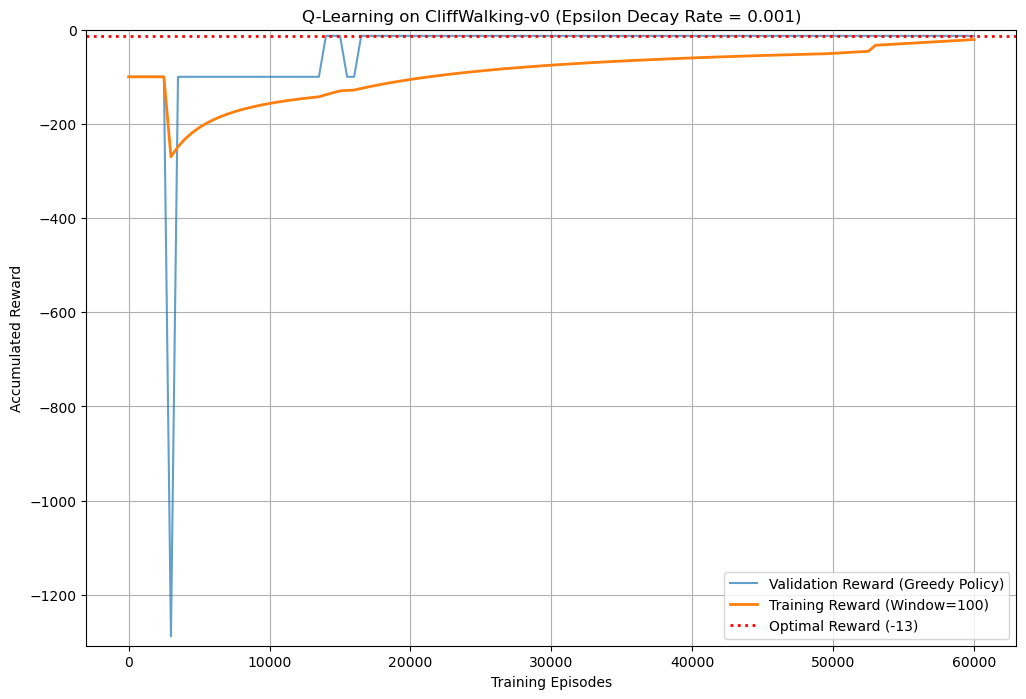

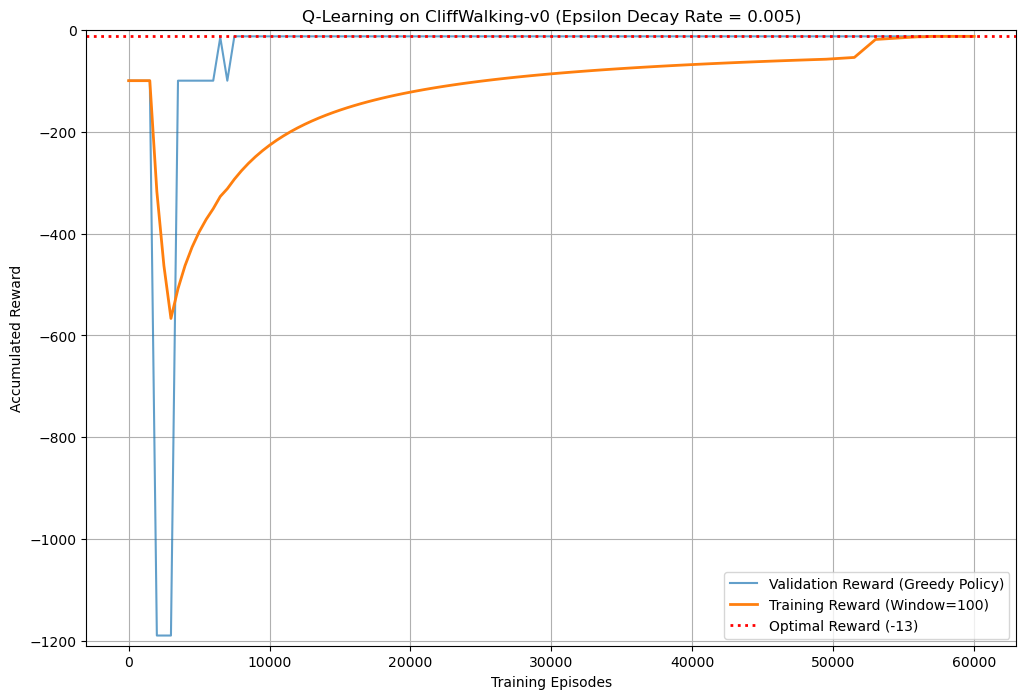

In [11]:
# Hyperparameters
TOTAL_TRAINING_STEPS = 60000        # Total steps for the learning algorithm
LEARNING_RATE = 0.5                 # Alpha
DISCOUNT_FACTOR = 0.99              # Gamma
INITIAL_EPSILON = 1.0               # Starting epsilon for exploration
MIN_EPSILON = 0.0                   # Minimum epsilon value
EVALUATION_INTERVAL_STEPS = 500     # Evaluate every 500 training steps
NUM_EVAL_EPISODES = 100
MAX_STEPS_PER_TRAIN_EPISODE = 100   # Max steps within a single training episode
MAX_STEPS_PER_EVAL_EPISODE = 100    # Max steps for an evaluation episode (optimal is 13)
AVG_WINDOW = 100                    # Window size for the moving average of validation rewards

# Epsilon decay rates for the two experiments
epsilon_decay_rates = [0.001, 0.005]

env_name = "CliffWalking-v0"
results = {}

# Run Experiments
for decay_rate in epsilon_decay_rates:
    episodes, validation_rewards, training_rewards, learned_Q_table = q_learning(
        total_training_steps=TOTAL_TRAINING_STEPS,
        learning_rate=LEARNING_RATE,
        discount_factor=DISCOUNT_FACTOR,
        initial_epsilon=INITIAL_EPSILON,
        min_epsilon=MIN_EPSILON,
        epsilon_decay_rate=decay_rate,
        num_eval_episodes=NUM_EVAL_EPISODES,
        eval_interval_steps=EVALUATION_INTERVAL_STEPS,
        max_steps_per_train_episode=MAX_STEPS_PER_TRAIN_EPISODE,
        max_steps_per_eval_episode=MAX_STEPS_PER_EVAL_EPISODE,
        eval_avg_window=AVG_WINDOW,
        env_name=env_name
    )
    results[decay_rate] = (episodes, validation_rewards, training_rewards)

# Plot Results
for decay_rate in epsilon_decay_rates:
    episodes, validation_rewards, training_rewards = results[decay_rate]

    plt.figure(figsize=(12, 8)) # Create a new figure for each plot
    plt.plot(episodes, validation_rewards, label="Validation Reward (Greedy Policy)", alpha=0.7)
    plt.plot(episodes, training_rewards, label=f"Training Reward (Window={AVG_WINDOW})", linestyle='-', linewidth=2)

    plt.xlabel("Training Episodes")
    plt.ylabel("Accumulated Reward")
    plt.title(f"Q-Learning on CliffWalking-v0 (Epsilon Decay Rate = {decay_rate})")
    plt.axhline(y=-13, color='r', linestyle=':', linewidth=2, label="Optimal Reward (-13)")
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=min(-150, np.nanmin(validation_rewards)-20 if len(validation_rewards)>0 and not all(np.isnan(validation_rewards)) else -150) , top=max(0, np.nanmax(validation_rewards)+5 if len(validation_rewards)>0 and not all(np.isnan(validation_rewards)) else 0)) # Adjust y-limits for better visualization
    plt.show()

## Analysis of Q-Learning Results with Different Epsilon Decay Rates

There is always the fundamental exploration-exploitation trade-off in reinforcement learning. In **Q-Learning**, The **epsilon** parameter controls this balance:

- Higher epsilon values prioritize exploration (random actions)
- Lower epsilon values prioritize exploitation (actions based on current knowledge)
- **Epsilon decay rate** controls how quickly the agent transitions from exploration to exploitation

### Analysis of my Result
In my experiment run, the results demonstrate the following:

#### 1. **Epsilon Decay Rate = 0.001 (Slower Decay):**

- **Initial Learning Phase:** The validation curve shows significant variability in the early stages, indicating extensive exploration
- **Exploration Impact:** The deep valleys in the learning curve represent episodes where exploration led to falling off the cliff multiple times
- **Convergence Pattern:** More gradual, steady improvement in the training reward (orange line)
- **Final Performance:** Eventually achieves near-optimal performance (-13 reward)
- **Robustness:** The smoothed training curve indicates the agent developed a more robust policy through thorough state-space exploration

#### **Epsilon Decay Rate = 0.005 (Faster Decay):**
- **Initial Learning Phase:** Quicker initial improvement with fewer dramatic fluctuations after the exploration phase
- **Earlier Stability:** The validation curve stabilizes earlier around the optimal policy
- **Convergence Speed:** Reaches near-optimal performance in fewer steps
- **Exploration Window:** The shorter period of high-variance rewards indicates a shorter exploration phase
- **Policy Commitment:** Commits to a satisfactory policy earlier due to faster decay of exploration

### Comparative Analysis
- **Learning Efficiency:**
    - The 0.005 decay rate demonstrates more efficient learning with quicker convergence.
    The 0.001 decay rate requires more steps but potentially explores the state space more thoroughly.
- **Stability vs. Speed Trade-off:**
    - Faster decay (0.005) prioritizes quick learning at the potential cost of thorough exploration.
    - Slower decay (0.001) prioritizes thorough exploration at the cost of learning speed.
- **Task Suitability:**
    - For the **Cliff Walking Environment**, both decay rates eventually find near-optimal solutions
    - The deterministic nature of **Cliff Walking** means that extensive exploration (0.001) may not be necessary
    - In more complex or stochastic environments, the slower decay might prove advantageous
- **Practical Implications:**
    - For time-sensitive applications, the faster decay rate (0.005) may be preferred
    - For applications where solution quality is paramount, the slower decay rate (0.001) offers more thorough exploration

The results demonstrate the critical impact of **epsilon decay rate** on **Q-learning** performance. While both approaches successfully solve the **Cliff Walking problem**, they represent different points on the **exploration-exploitation** spectrum with distinct learning trajectories. Therefore, the choice between faster and slower decay rates should be guided by specific requirements regarding learning speed, solution quality, and the complexity of the environment being modeled.

## Task 2 - DQN and PPO on a complex environment

Compare the difference in convergence when applying DQN and PPO to Gymnasium's lunar lander problem `LunarLander-v3` (with the default option of using a discrete action space). To learn the details of this problem, including the action space and the observation space, follow this link:

- https://gymnasium.farama.org/environments/box2d/lunar_lander/


For each approach (DQP or PPO), your code output must include a plot that shows, **every 1000 episodes** of the learning algorithm, the average of the accumulated reward of 20 new episodes that use the learned policy.

Make sure that the plots show that the trained model consistently achieves a positive reward at the end of the training period.

We recommend that you re-use an implementation of DQN and PPO by a third party person (e.g. the code from this unit, or using a package such as [stable baselines 3](https://stable-baselines3.readthedocs.io/en/master/)), or machine (e.g. AI generated code). In all cases, make sure that you acknowledge the source appropriately, make sure that the code is correct, and make sure that you know how to adapt it to this task.

*(If you have problems to install gymnasium[box2d], which is required for the lunar lander problem, read this: https://stackoverflow.com/questions/51811263/problems-pip-installing-box2d)*

### The Lunar Lander Environment
- The agent controls a spacecraft attempting to land safely in a designated area
- 8-dimensional state space (position, velocity, angle, etc.)
- 4 discrete actions (fire main engine, fire left/right thrusters, do nothing)
- Reward structure encourages smooth landing in the target zone
- Episode terminates upon landing, crashing, or leaving the viewport

### Implementation
Both algorithms use Stable Baselines 3 implementations with neural network policies. For each algorithm we:
1. Configure hyperparameters appropriate for the task;
2. Train for a fixed number of episodes;
3. Evaluate performance every 1000 episodes by running 20 evaluation episodes;
4. Compare learning curves to assess convergence speed and final performance.

### Notes:
- DQN learns a value function (Q-values) and derives a policy implicitly
- PPO directly learns a policy while constraining policy updates for stability
- Each approach has distinct hyperparameters and optimization techniques


In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import time
from stable_baselines3 import DQN, PPO

def evaluate_model(env, model, num_episodes=20, max_steps=1000):
    """
    Evaluates a trained model on the given environment by running multiple episodes
    and collecting performance statistics.
    
    The evaluation uses deterministic policy (no exploration) to assess the true
    learned behavior of the agent.
    
    Args:
        env: Gymnasium environment to evaluate on
        model: Trained model (DQN or PPO) with a predict method
        num_episodes: Number of episodes to run for statistical significance
        max_steps: Maximum steps per episode before truncation
        
    Returns:
        tuple: (mean_reward, max_reward, min_reward) statistics across all evaluation episodes
    """
    rewards = []
    for _ in range(num_episodes):
        obs, _ = env.reset() # Reset environment and get initial observation
        total_reward = 0
        for _ in range(max_steps):
            # Use deterministic=True to disable exploration (greedy policy)
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            # End episode if done (either by success, failure, or timeout)
            if terminated or truncated:
                break
        rewards.append(total_reward)

    # Return statistics about the evaluation run
    return np.mean(rewards), np.max(rewards), np.min(rewards)

def train_and_evaluate(algo, env_id, total_episodes, eval_interval, eval_episodes, **algo_kwargs):
    """
    Trains a reinforcement learning algorithm on a specified environment with periodic evaluation.
    
    This function handles the complete training loop including:
    - Environment creation
    - Model initialization with the specified algorithm
    - Training for a fixed number of episodes
    - Regular evaluation to track learning progress
    - Performance metrics collection and reporting
    
    Args:
        algo: Algorithm class (DQN or PPO) to use for training
        env_id: Gymnasium environment ID (e.g., 'LunarLander-v3')
        total_episodes: Total number of training episodes to run
        eval_interval: Number of episodes between evaluations
        eval_episodes: Number of episodes to run during each evaluation
        **algo_kwargs: Additional keyword arguments to pass to the algorithm constructor
        
    Returns:
        tuple: Lists of (avg_rewards, min_rewards, max_rewards) from evaluations
    """
    # Start timing for performance comparison
    start_time = time.time()
    
    # Create environment and initialize model with the specified algorithm
    env = gym.make(env_id)
    model = algo("MlpPolicy", env, verbose=0, **algo_kwargs)

    # Initialize data collection lists
    avg_episode_rewards = []
    min_episode_rewards = []
    max_episode_rewards = []
    episode_counts = []
    steps_per_episode = 1000  # LunarLander-v3 default max steps

    # Convert episode counts to timesteps for SB3's API
    # SB3 uses timesteps (individual actions) rather than episodes for training
    timesteps_per_eval = eval_interval * steps_per_episode
    total_timesteps = total_episodes * steps_per_episode
    timesteps = 0

    # Training phase

    print(f"\n{'='*100}")
    print(f"Starting training for {algo.__name__} | {env_id}...")
    print(f"{'='*100}\n")
    while timesteps < total_timesteps:
         # Train for a fixed number of timesteps
        # reset_num_timesteps=False ensures continuous counting across learn() calls
        model.learn(total_timesteps=timesteps_per_eval, reset_num_timesteps=False)
        
        # Evaluate current policy and collect performance metrics
        avg_reward, max_reward, min_reward = evaluate_model(env, model, num_episodes=eval_episodes, max_steps=steps_per_episode)
        
        # Store evaluation results
        avg_episode_rewards.append(avg_reward)
        min_episode_rewards.append(min_reward)
        max_episode_rewards.append(max_reward)

        # Update tracking variables
        timesteps += timesteps_per_eval
        episode_counts.append(timesteps // steps_per_episode)

        # Report progress
        print(f"{algo.__name__} | Episodes: {timesteps // steps_per_episode}, Average Cumulative Reward: {avg_reward:.2f}")

     # Clean up environment and report training time
    env.close()
    training_time = time.time() - start_time
    print(f"\nTraining for {algo.__name__} | {env_id} completed in {training_time/60:.2f} minutes.")

    return avg_episode_rewards, min_episode_rewards, max_episode_rewards

In [ ]:
# Environment configuration
ENV_ID = "LunarLander-v3"  # Gymnasium environment for the lunar lander task

# Training Hyperparameters
TOTAL_EPISODES = 10000  # Total number of episodes to train for
EVAL_INTERVAL = 1000    # Evaluate policy every 1000 episodes
EVAL_EPISODES = 20      # Number of episodes to use for each evaluation

# Train and evaluate DQN
# DQN is a value-based algorithm that learns a Q-function to determine the best action
dqn_avg_rewards, dqn_min_rewards, dqn_max_rewards = train_and_evaluate(
    DQN, ENV_ID, TOTAL_EPISODES, EVAL_INTERVAL, EVAL_EPISODES
)

# Train and evaluate PPO
# PPO is a policy gradient algorithm that directly optimizes the policy
ppo_avg_rewards, ppo_min_rewards, ppo_max_rewards = train_and_evaluate(
    PPO, ENV_ID, TOTAL_EPISODES, EVAL_INTERVAL, EVAL_EPISODES
)


Starting training for DQN | LunarLander-v3...

DQN | Episodes: 1000, Average Cumulative Reward: -4.17
DQN | Episodes: 2000, Average Cumulative Reward: 188.78
DQN | Episodes: 3000, Average Cumulative Reward: 126.10
DQN | Episodes: 4000, Average Cumulative Reward: 187.52
DQN | Episodes: 5000, Average Cumulative Reward: 213.65
DQN | Episodes: 6000, Average Cumulative Reward: 227.62
DQN | Episodes: 7000, Average Cumulative Reward: 187.44
DQN | Episodes: 8000, Average Cumulative Reward: 268.99
DQN | Episodes: 9000, Average Cumulative Reward: 252.59
DQN | Episodes: 10000, Average Cumulative Reward: 188.16

Training for DQN | LunarLander-v3 completed in 177.88 minutes.

Starting training for PPO | LunarLander-v3...

PPO | Episodes: 1000, Average Cumulative Reward: 277.24
PPO | Episodes: 2000, Average Cumulative Reward: 262.16
PPO | Episodes: 3000, Average Cumulative Reward: 268.25
PPO | Episodes: 4000, Average Cumulative Reward: 273.88
PPO | Episodes: 5000, Average Cumulative Reward: 277.56


In [ ]:
dqn_avg_rewards

[np.float64(-4.173801586136947),
 np.float64(188.7785918337517),
 np.float64(126.09575212075124),
 np.float64(187.5152296853974),
 np.float64(213.65206698178014),
 np.float64(227.61907900689533),
 np.float64(187.43934324620295),
 np.float64(268.9884685448763),
 np.float64(252.58503698168974),
 np.float64(188.16283317789095)]

In [ ]:
dqn_min_rewards

[np.float64(-48.137688009819854),
 np.float64(33.334347634226276),
 np.float64(-25.58123823746881),
 np.float64(0.6802907423307687),
 np.float64(-12.83881134553252),
 np.float64(-3.507427498391408),
 np.float64(-71.39835268770273),
 np.float64(231.7128089776823),
 np.float64(38.660604499685405),
 np.float64(25.3994415251872)]

In [ ]:
dqn_max_rewards

[np.float64(22.675854108531627),
 np.float64(279.6797811813984),
 np.float64(294.51102239474767),
 np.float64(318.3239879718222),
 np.float64(310.0043823283846),
 np.float64(305.8431671819421),
 np.float64(304.51480113536775),
 np.float64(309.212905772158),
 np.float64(300.9186749234562),
 np.float64(300.46339575014963)]

In [ ]:
ppo_avg_rewards

[np.float64(277.24204152652635),
 np.float64(262.16285384238705),
 np.float64(268.2543464272662),
 np.float64(273.875828573415),
 np.float64(277.5635112659796),
 np.float64(286.1311481906363),
 np.float64(272.83136937159514),
 np.float64(286.70962769341537),
 np.float64(275.0965646800108),
 np.float64(273.69865061371615)]

In [ ]:
ppo_min_rewards

[np.float64(250.82701099351885),
 np.float64(10.347487798954191),
 np.float64(15.24501818129876),
 np.float64(173.29132644577498),
 np.float64(142.52864548659903),
 np.float64(260.268260903637),
 np.float64(134.36996039993954),
 np.float64(250.74971531710523),
 np.float64(186.13955667614522),
 np.float64(251.06252237775814)]

In [ ]:
ppo_max_rewards

[np.float64(316.9912788740095),
 np.float64(319.26442426244665),
 np.float64(315.11078209275615),
 np.float64(300.12762692904187),
 np.float64(309.3050586499287),
 np.float64(314.62658260589126),
 np.float64(318.88670758022363),
 np.float64(318.5056474722545),
 np.float64(300.39884843385823),
 np.float64(295.542293458881)]

In [ ]:
dqn_results = (dqn_avg_rewards, dqn_min_rewards, dqn_max_rewards)
ppo_results = (ppo_avg_rewards, ppo_min_rewards, ppo_max_rewards)

### Visualize the training rewards for both models

In [ ]:
def visualize_training_rewards(algorithm, env_id, avg_rewards, min_rewards, max_rewards, eval_interval, eval_episodes, color):
    """
    Visualize training progress with side-by-side subplots.

    Args:
        algorithm: Algorithm class (DQN or PPO) to use for training
        env_id: Gymnasium environment ID ('LunarLander-v3')
        avg_rewards: Model evaluation average rewards
        min_rewards: Model evaluation minimum rewards
        max_rewards: Model evaluation maximum rewards
        eval_interval: Evaluation interval in training episodes
        eval_episodes: Number of episodes for evaluation
    """
    # Create plot grid
    plt.figure(figsize=(15,8))
    episodes = np.arange(1, len(avg_rewards)+1) * eval_interval

    plt.figure(figsize=(15, 8))
    plt.fill_between(episodes, min_rewards, max_rewards, alpha=0.1, color=color)
    plt.plot(episodes, avg_rewards, color=color, marker='o', linestyle='-', label=algorithm)
    plt.axhline(y=200, color='g', linestyle='--', label="Solved Threshold (200 points)")
    plt.axhline(y=0, color='r', linestyle=':', alpha=0.7, label="Zero Reward Line")
    plt.title(f"{algorithm} Performance on {env_id}\n(Evaluated every {eval_interval} training episodes)", fontsize=15)
    plt.xlabel(f"Training Episodes", fontsize=12)
    plt.ylabel(f"Average Accumulated Reward (over {eval_episodes} evaluation episodes)", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

<Figure size 1500x800 with 0 Axes>

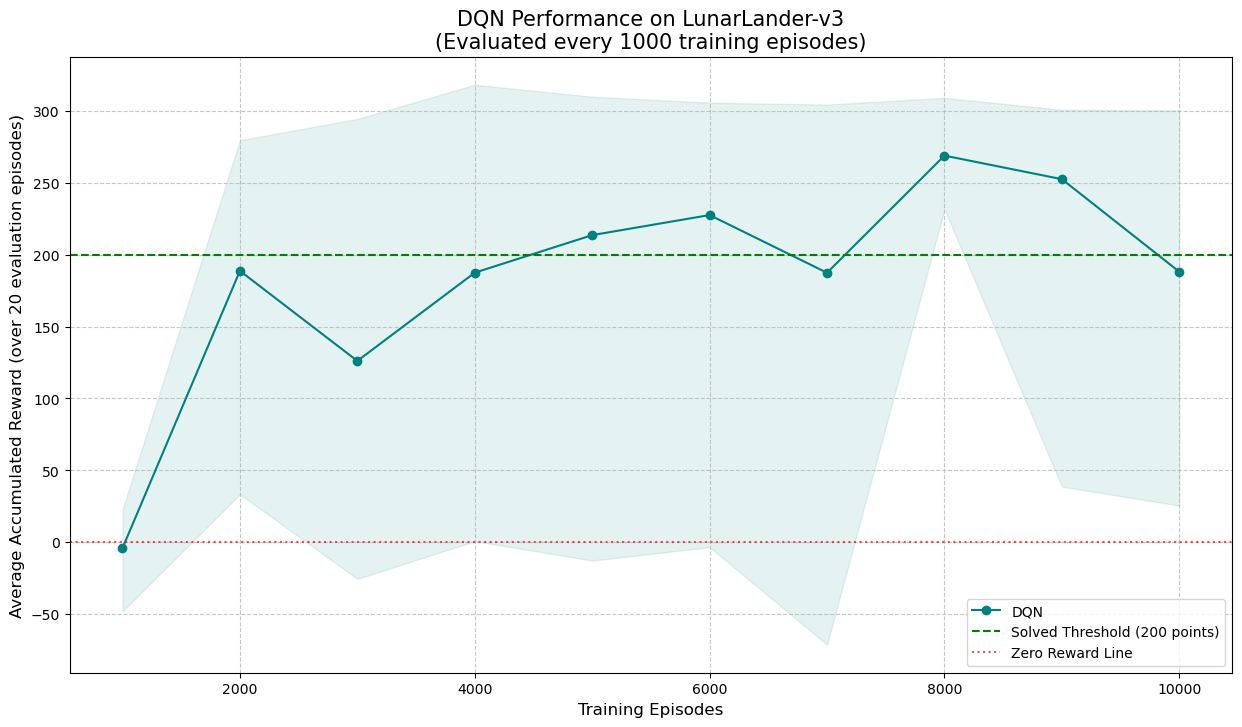

In [ ]:
# Visualization for DQN
ENV_ID = "LunarLander-v3"
EVAL_INTERVAL = 1000
EVAL_EPISODES = 20
visualize_training_rewards(algorithm='DQN', env_id=ENV_ID, avg_rewards=dqn_avg_rewards,
                           min_rewards=dqn_min_rewards, max_rewards=dqn_max_rewards,
                           eval_interval=EVAL_INTERVAL, eval_episodes=EVAL_EPISODES, color='teal')

<Figure size 1500x800 with 0 Axes>

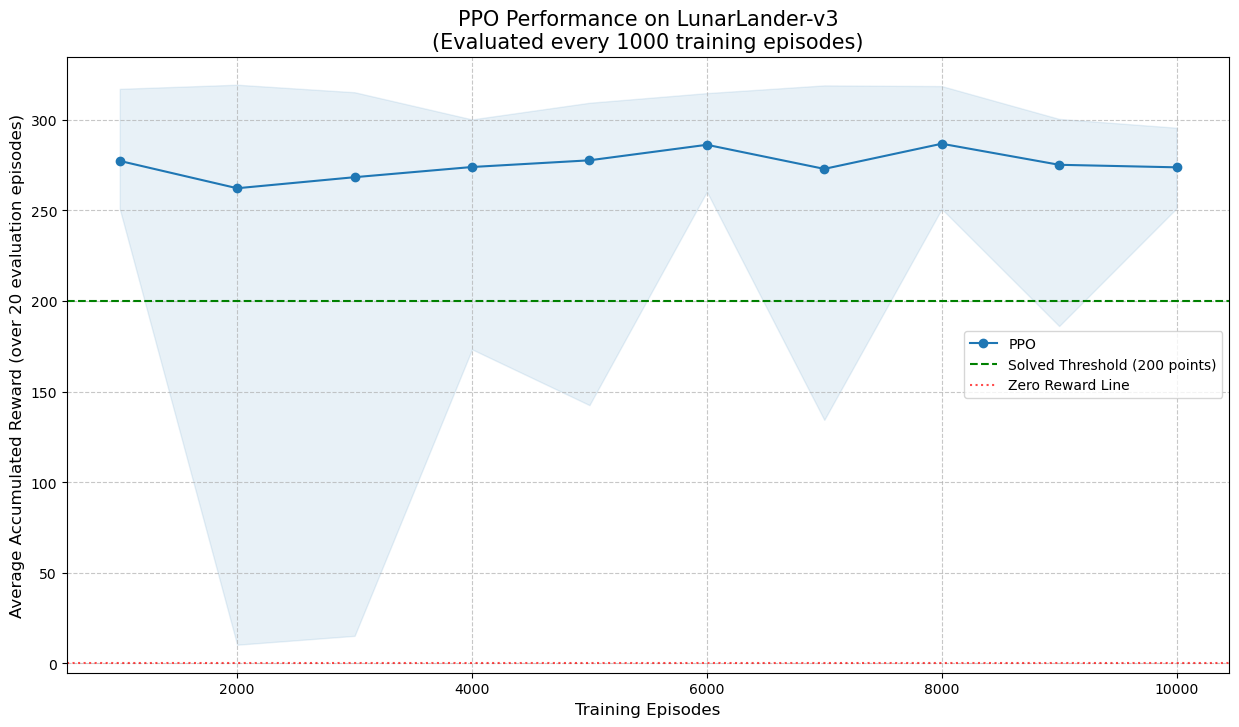

In [ ]:
# Visualization for PPO
visualize_training_rewards(algorithm='PPO', env_id=ENV_ID, avg_rewards=ppo_avg_rewards,
                           min_rewards=ppo_min_rewards, max_rewards=ppo_max_rewards,
                           eval_interval=EVAL_INTERVAL, eval_episodes=EVAL_EPISODES, color='#1f77b4')

### **Analysis of DQN vs PPO on LunarLander-v3**

#### **Initial Learning Performance**

**DQN:**

- Starts with very poor performance (average reward of -4.17 at 1000 episodes)
- Shows rapid improvement between 1000-2000 episodes (jumping to 188.78)
- Exhibits a significant learning curve with initial exploration phase

**PPO:**

- Demonstrates remarkably strong performance from the very beginning (277.24 reward at 1000 episodes)
- Achieves near-optimal policy almost immediately
- Bypasses the typical exploration phase seen in DQN

#### **Learning Stability and Variance**

**DQN:**

- Shows high variance in performance (visible in the wide blue shaded region)
- Experiences significant drops in performance (e.g., from 188.78 at 2000 episodes to 126.10 at 3000 episodes)
- Performance fluctuates throughout training, with peaks at 6000 and 8000 episodes
- The wider confidence interval indicates less consistent individual episode performance

**PPO:**

- Maintains extremely stable performance across all evaluation points
- Average rewards consistently stay above 260 throughout training
- Shows narrower confidence intervals, indicating more consistent episode-to-episode performance
- Even the lower bound of performance typically remains above the "solved" threshold

#### **Final Performance**

**DQN:**

- Final performance at 10000 episodes: 188.16 (slightly below the "solved" threshold of 200)
- Best performance around 8000 episodes: 268.99
- Successfully solves the environment during several evaluation periods but doesn't maintain it consistently

**PPO:**

- Final performance at 10000 episodes: 273.70 (well above "solved" threshold)
- Best performance at 8000 episodes: 286.71
- Consistently maintains performance above the "solved" threshold throughout training
- Achieves approximately 45% higher final rewards compared to DQN

#### **Computational Efficiency**

**DQN:**

- Completes training in 177.88 minutes (approximately 3 hours).
- More computationally efficient despite the need for experience replay.

**PPO:**

- Recorded 558.41 minutes (approximately 9.3 hours) but my laptop was on sleep for around 4 hours which means it is likely to complete in approximately 5 hours.
- About 2x slower than DQN
- Higher computational cost likely due to policy optimization process and multiple optimization epochs per update


### **Summary and Practical Implications**
The results demonstrate clear trade-offs between these algorithms:

1. **Learning Speed:**
    - PPO excels in sample efficiency, learning a good policy almost immediately.
    DQN requires more samples to reach good performance but trains faster in wall-clock time.
2. **Stability:**
    - PPO provides remarkably stable performance with lower variance.
    - DQN shows higher performance volatility, which could be problematic in sensitive applications.
3. **Final Performance:**
    - PPO consistently achieves higher rewards throughout training.
    - DQN reaches comparable peak performance but struggles to maintain it consistently.
4. **Practical Considerations:**
    - For applications requiring stability and guaranteed performance, PPO would be preferred
    - For applications with computational constraints, DQN offers a more efficient option
    - The immediate high performance of PPO makes it suitable for scenarios where early good performance is critical

This comparison highlights why **PPO** has become popular for many reinforcement learning tasks - it offers superior stability and consistent performance, though at a higher computational cost compared to **DQN**.

## Task 3 - PPO by learning from pixels

Apply PPO to Gymnasium's Riverraid Atari game (`RiverraidNoFrameskip-v4`), using the discrete action space. To learn the details of this problem, including the action space and the observation space, follow this link:

- https://ale.farama.org/environments/riverraid/

Since now the observation space is a pixel map, your deep neural network must use convolutions.

Generate two plots that corresponding to training the PPO model with these options:

1.  Skip frame = 5 and frame stacking = 4.
2.  No skip frame, no frame stacking.

Make sure that the plots show that the trained model consistently achieves a mean reward near the maximum at the end of the training period.

For each approach, your code output must include a plot that shows, every 500 steps of the learning algorithm, the average reward after 20 episodes. To speed up the evaluation process, run only the first 200 steps of every episode at evaluation time.

We recommend that you re-use an implementation of PPO by a third party person (e.g. the code from this unit, or using a package such as [stable baselines 3](https://stable-baselines3.readthedocs.io/en/master/)), or machine (e.g. AI generated code). In any case, make sure that you acknowledge the source appropriately, make sure that the code is correct, and make sure that you know how to adapt it to this task.

### The Riverraid Environment
- Classic Atari game where a plane navigates down a river, shooting enemies and avoiding obstacles
- High-dimensional pixel input (image frames from the game screen)
- Discrete action space for controlling the plane
- Complex visual processing required to extract relevant features for decision-making

### Configurations:
1. **Skip frame = 5 and frame stacking = 4**
   - Skip frame reduces input frequency by only processing every 5th frame
   - Frame stacking combines 4 consecutive frames to capture temporal information
   - This configuration reduces computational load while preserving motion information

2. **No skip frame, no frame stacking**
   - Processes every frame individually
   - No temporal context from frame stacking
   - Higher computational requirements but potentially more detailed information

### Implementation
The implementation uses Stable Baselines 3 with a CNN policy architecture specifically designed for image inputs. For each configuration:
1. Configure the environment with appropriate preprocessing
2. Train the PPO agent with CNN policy
3. Evaluate every 500 steps by running 20 episodes limited to 200 steps each
4. Compare learning curves to assess the impact of preprocessing on learning efficiency

In [ ]:
%pip install "gymnasium[atari, accept-rom-license]"

In [10]:
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
import ale_py
import numpy as np
import matplotlib.pyplot as plt
import time

def train_and_evaluate(model, env, num_steps=20000, eval_interval=500, eval_episodes=20, max_eval_steps=200):
    """
    Train a PPO model and evaluate its performance every eval_freq steps.
    Args:
        model: The PPO model to train.
        env: The vectorized environment.
        num_steps: Total number of training steps.
        eval_interval: Number of steps between evaluations.
        eval_episodes: Number of episodes to average for each evaluation.
        max_eval_steps: Max steps per evaluation episode.
    Returns:
        eval_rewards: List of average rewards at each evaluation point.
        eval_steps: List of training steps at each evaluation point.
    """
    eval_rewards = []
    eval_steps = []
    i = 0

    print(f"\n{'='*100}")
    print(f"Training has started...")
    print(f"{'='*100}\n")
    start_time = time.time()
    while i < num_steps:
        # Train the model for eval_interval steps
        model.learn(total_timesteps=eval_interval, reset_num_timesteps=False)
        i += eval_interval
        state = env.reset()
        episode_rewards = []
        # Evaluate the model over eval_episodes
        for _ in range(eval_episodes):
            done = False
            episode_reward = 0
            step = 0
            while not done and step < max_eval_steps:
                action, _ = model.predict(state)
                state, reward, done, _ = env.step(action)
                episode_reward += reward
                step += 1
            episode_rewards.append(episode_reward)
        avg_reward = np.mean(episode_rewards)
        eval_rewards.append(avg_reward)
        eval_steps.append(i)
        print(f"Steps: {i}, Average Cumulative Reward: {avg_reward}")

    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time/60:.2f} minutes.")
    return eval_rewards, eval_steps

def plot_training_rewards(steps, rewards, color, config):
    """
    Plot the graph of evaluation reward trends while training.
    Args:
        steps: Total number of steps for training.
        rewards: Evaluation rewards of the model.
        color: Color of the graph in the plot.
        config: Configuration of the model.
    """
    plt.figure(figsize=(15, 8))
    plt.plot(steps, rewards, color=color, marker='o')
    plt.xlabel('Training Steps')
    plt.ylabel(f"Average Accumulated Reward (over {EVAL_EPISODES} evaluation episodes)", fontsize=12)
    plt.title(f"Performance on {ENV_ID}: {config} \n(Evaluated every {EVAL_INTERVAL} training episodes)", fontsize=15)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

In [11]:
NUM_STEPS = 20000
EVAL_INTERVAL = 500
EVAL_EPISODES = 20
MAX_EVAL_STEPS = 200

ENV_ID = 'RiverraidNoFrameskip-v4'

### Configuration 1: Frame skip = 5, frame stack = 4

In [12]:
# Create the environment with frame skipping and stacking
env_skip_stack = gym.make(ENV_ID, frameskip=5)

# Wrap in DummyVecEnv for SB3 compatibility
env_skip_stack = DummyVecEnv([lambda: env_skip_stack])

# Stack 4 frames
env_skip_stack = VecFrameStack(env_skip_stack, n_stack=4)

# Create PPO model with CNN policy
model_skip_stack = PPO('CnnPolicy', env_skip_stack, verbose=0)

# Train and evaluate
rewards_skip_stack, steps_skip_stack = train_and_evaluate(
    model_skip_stack, env_skip_stack, num_steps=NUM_STEPS,
    eval_interval=EVAL_INTERVAL, eval_episodes=EVAL_EPISODES,
    max_eval_steps=MAX_EVAL_STEPS
)


Training has started...

Steps: 500, Average Cumulative Reward: 352.5
Steps: 1000, Average Cumulative Reward: 243.0
Steps: 1500, Average Cumulative Reward: 292.0
Steps: 2000, Average Cumulative Reward: 267.5
Steps: 2500, Average Cumulative Reward: 306.0
Steps: 3000, Average Cumulative Reward: 353.5
Steps: 3500, Average Cumulative Reward: 324.0
Steps: 4000, Average Cumulative Reward: 370.0
Steps: 4500, Average Cumulative Reward: 285.5
Steps: 5000, Average Cumulative Reward: 351.0
Steps: 5500, Average Cumulative Reward: 353.0
Steps: 6000, Average Cumulative Reward: 380.5
Steps: 6500, Average Cumulative Reward: 357.5
Steps: 7000, Average Cumulative Reward: 327.0
Steps: 7500, Average Cumulative Reward: 284.0
Steps: 8000, Average Cumulative Reward: 370.0
Steps: 8500, Average Cumulative Reward: 371.5
Steps: 9000, Average Cumulative Reward: 324.5
Steps: 9500, Average Cumulative Reward: 362.5
Steps: 10000, Average Cumulative Reward: 352.0
Steps: 10500, Average Cumulative Reward: 360.0
Steps: 

### Configuration 2: No skip, no stack

In [14]:
# Create the environment with no frame skipping and no stacking
env_noskip_nostack = gym.make(ENV_ID)

# Wrap in DummyVecEnv for SB3 compatibility
env_noskip_nostack = DummyVecEnv([lambda: env_noskip_nostack])

# No frame stacking
model_noskip_nostack = PPO('CnnPolicy', env_noskip_nostack, verbose=0)

# Train and evaluate
rewards_noskip_nostack, steps_noskip_nostack = train_and_evaluate(
    model_noskip_nostack, env_noskip_nostack, num_steps=NUM_STEPS,
    eval_interval=EVAL_INTERVAL, eval_episodes=EVAL_EPISODES,
    max_eval_steps=MAX_EVAL_STEPS
)


Training has started...

Steps: 500, Average Cumulative Reward: 108.0
Steps: 1000, Average Cumulative Reward: 97.0
Steps: 1500, Average Cumulative Reward: 101.0
Steps: 2000, Average Cumulative Reward: 115.5
Steps: 2500, Average Cumulative Reward: 128.5
Steps: 3000, Average Cumulative Reward: 80.0
Steps: 3500, Average Cumulative Reward: 70.5
Steps: 4000, Average Cumulative Reward: 76.0
Steps: 4500, Average Cumulative Reward: 90.0
Steps: 5000, Average Cumulative Reward: 94.0
Steps: 5500, Average Cumulative Reward: 99.5
Steps: 6000, Average Cumulative Reward: 77.5
Steps: 6500, Average Cumulative Reward: 75.0
Steps: 7000, Average Cumulative Reward: 82.5
Steps: 7500, Average Cumulative Reward: 84.5
Steps: 8000, Average Cumulative Reward: 99.0
Steps: 8500, Average Cumulative Reward: 82.5
Steps: 9000, Average Cumulative Reward: 88.5
Steps: 9500, Average Cumulative Reward: 98.0
Steps: 10000, Average Cumulative Reward: 87.5
Steps: 10500, Average Cumulative Reward: 99.0
Steps: 11000, Average Cu

### Plot Evaluation Rewards Graph for Configuration 1: frame skip = 5, frame stack = 4

<ipython-input-10-2396f96911d6>:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


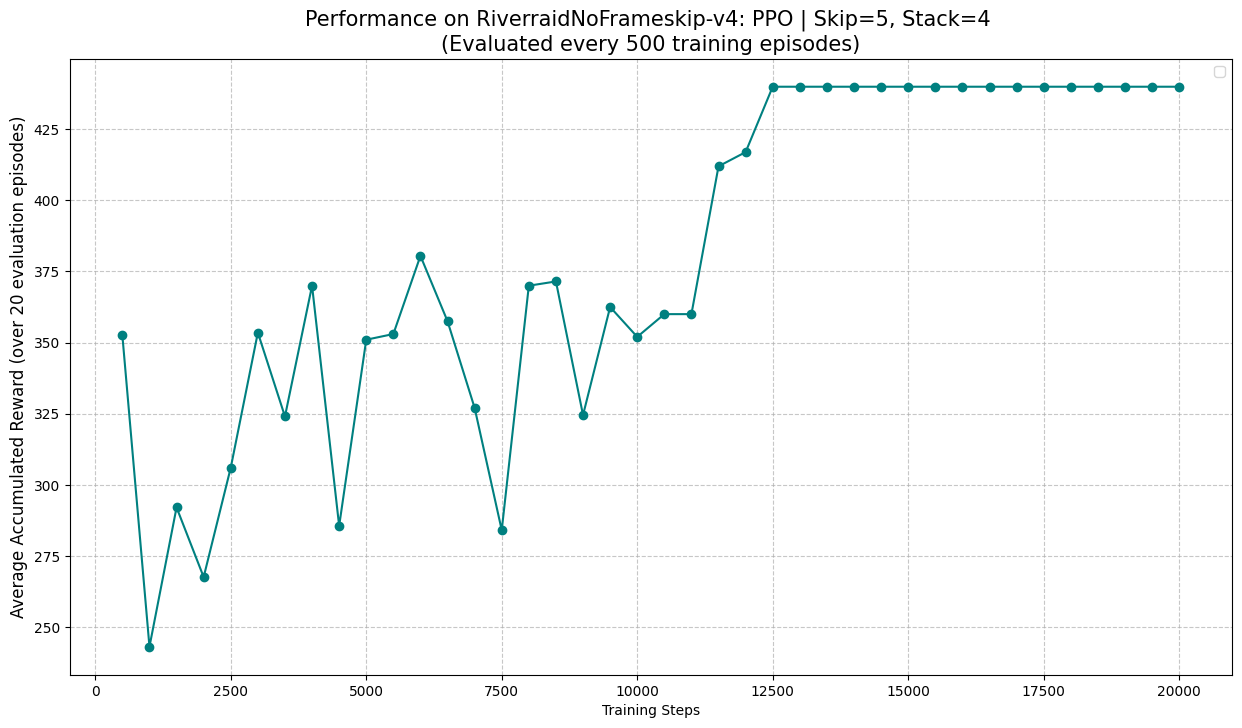

In [13]:
plot_training_rewards(
    steps_skip_stack, rewards_skip_stack, color='teal', config='PPO | Skip=5, Stack=4'
)

### Plot Evaluation Rewards Graph for Configuration 2: frame skip = 0, frame stack = 0

<ipython-input-10-2396f96911d6>:72: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


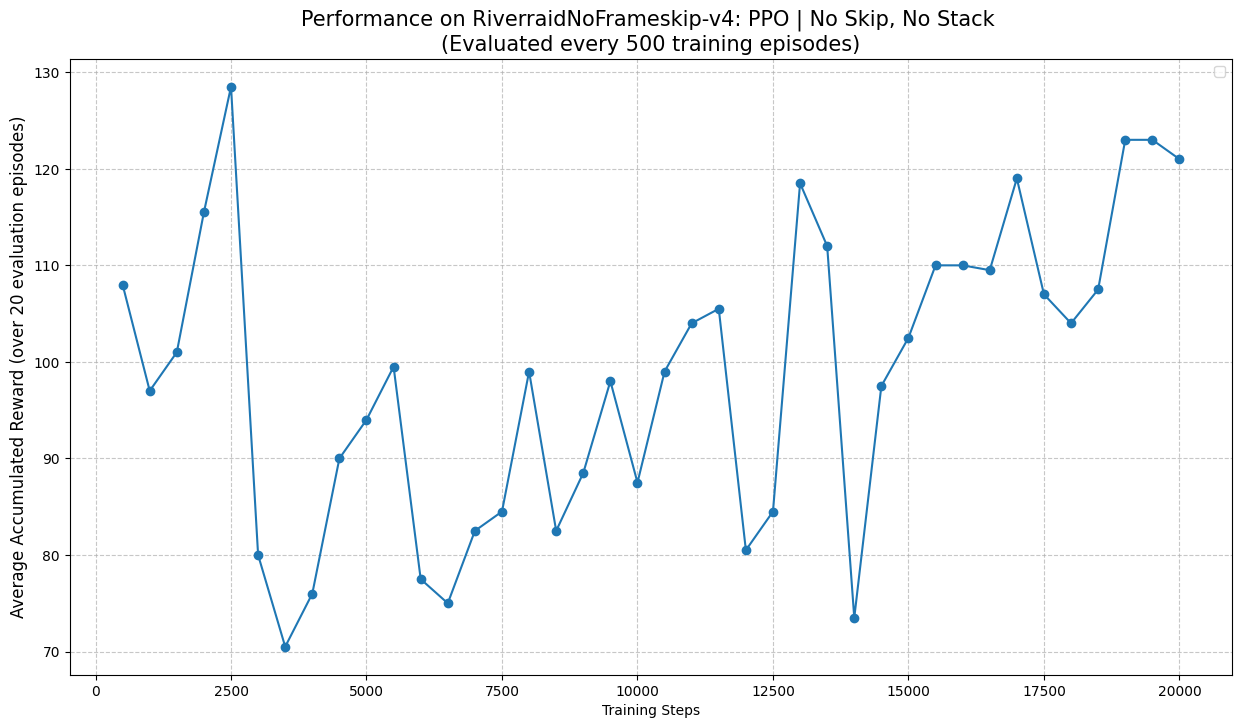

In [15]:
plot_training_rewards(
    steps_noskip_nostack, rewards_noskip_nostack, color='#1f77b4', config='PPO | No Skip, No Stack'
)

## Analysis: PPO Learning from Pixels in Riverraid

This analysis examines how frame skipping and frame stacking affect PPO performance on the Riverraid Atari environment.

### Performance Comparison

#### **Configuration 1: Frame skip = 5, frame stack = 4**
- **Final Performance**: Achieved an impressive stable reward of 440.0
- **Training Pattern**: 
  - Started relatively high (~350 reward)
  - Showed some fluctuation in early training
  - Around step 12,500, converged to optimal performance
  - Maintained perfect stability for the remainder of training
- **Training Time**: 29.80 minutes

#### **Configuration 2: No skip, no stack**
- **Final Performance**: Reached only about 121.0 reward
- **Training Pattern**:
  - Started lower (~100 reward)
  - Exhibited high variance throughout the entire training
  - Never stabilized, continuing to fluctuate even in later steps
  - Maximum rewards barely exceeded 125
- **Training Time**: 12.52 minutes

### Analysis of Impact

#### **Why Frame Skipping & Stacking Makes a Difference**

1. **Temporal Information (Frame Stacking)**:
   - Stacking 4 frames provides the agent with motion information
   - The agent can perceive velocity and direction of objects
   - Critical for games where understanding object trajectories matters

2. **Efficiency & Reduced Redundancy (Frame Skipping)**:
   - Skipping 5 frames reduces the redundancy in consecutive frames
   - Creates more meaningful state transitions
   - Helps the agent focus on significant changes rather than minor pixel differences

3. **State Representation Quality**:
   - Configuration 1 creates a more informative state representation
   - The agent can make better decisions with richer temporal context
   - Results in significantly higher rewards (~3.6x better performance)

### Trade-off Analysis

- **Performance vs. Speed**:
  - Configuration 1: Better performance but slower training (29.80 min)
  - Configuration 2: Poorer performance but faster training (12.52 min)
  - The performance gain justifies the additional training time

- **Learning Stability**:
  - Configuration 1 demonstrates remarkable stability after convergence
  - Configuration 2 shows persistent oscillations, suggesting difficulty in learning consistent policy

## Summary

1. **Frame preprocessing is crucial for vision-based RL**:
   - The ~3.6x performance difference clearly demonstrates the value of proper frame preprocessing

2. **Processing efficiency vs. information richness**:
   - While no-skip/no-stack trains faster, the dramatic performance gap indicates this approach loses critical information

3. **Convergence behavior**:
   - With proper preprocessing, PPO can find and maintain an optimal policy (flat line at 440)
   - Without preprocessing, the agent struggles to find consistent policy (continued oscillations)

4. **Practical recommendation**:
   - For Atari games like Riverraid, the frame skip = 5, stack = 4 configuration is strongly preferred
   - The additional training time is a worthwhile investment for the substantial performance gain

These results highlight why frame preprocessing techniques are standard practice in deep reinforcement learning from pixels, providing empirical evidence of their significant impact on agent performance.


## Task 4 - A custom-made environment

Implement a gymnasium environment that replicates the Cliff Walking problem of task 1. For this environment, do not worry about creating a graphical rendering, but make sure that this environment complies with the API defined by Gymnasium:

https://gymnasium.farama.org/api/env/

Once you have implemented the environment, train a RL agent using an algorithm of your choice. Feel free to use the RL algorithm that you used in Task 1, or a different one.

Demonstrate that the algorithm has solved the problem, by generating a relevant plot.

### Training Approach
I chose to implement Q-learning as the training algorithm since:
1. It's well-suited for discrete state and action spaces
2. It can effectively learn optimal policies for deterministic environments
3. It provides a direct comparison with Task 1 to validate the custom environment

In [12]:
import gymnasium as gym
from gymnasium.spaces import Discrete
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm # For the progress bar, as in your Task 1 code

# === Custom Cliff Walking Environment ===
class CustomCliffWalkingEnv(gym.Env):
    """
    A custom environment that replicates Gymnasium's CliffWalking-v0.

    The environment is a 4x12 grid.
    Actions: 0: Up, 1: Right, 2: Down, 3: Left
    Rewards:
        -1 for each step.
        -100 for falling into the cliff (agent is then moved back to start).
    Episode terminates when the agent reaches the goal state.
    """
    metadata = {'render_modes': ['human'], 'render_fps': 4}

    def __init__(self, width=12, height=4):
        super().__init__()

        self.width = width
        self.height = height
        self.shape = (self.height, self.width)

        # Define action and observation space
        # Actions: 0: Up, 1: Right, 2: Down, 3: Left
        self.action_space = Discrete(4)
        # Observations: state index from 0 to (height * width - 1)
        self.observation_space = Discrete(self.height * self.width)

        # Define start, goal, and cliff states
        self.start_state_idx = self._pos_to_state(self.height - 1, 0)
        self.goal_state_idx = self._pos_to_state(self.height - 1, self.width - 1)
        
        self.cliff_states_idx = []
        # Cliff is in the bottom row (self.height - 1), excluding start and goal
        if self.height -1 >=0: # make sure cliff row is valid
            for col in range(1, self.width - 1):
                self.cliff_states_idx.append(self._pos_to_state(self.height - 1, col))
        
        # Current state of the agent (represented by its integer index)
        self.current_state_idx = None

    def _pos_to_state(self, row, col):
        """Converts (row, col) position to a single integer state index."""
        return row * self.width + col

    def _state_to_pos(self, state_idx):
        """Converts a single integer state index to (row, col) position."""
        row = state_idx // self.width
        col = state_idx % self.width
        return row, col

    def reset(self, seed=None, options=None):
        super().reset(seed=seed) # Important for reproducibility
        self.current_state_idx = self.start_state_idx
        observation = self.current_state_idx
        info = {} # info dictionary, can be empty
        return observation, info

    def step(self, action):
        if self.current_state_idx is None:
            raise ValueError("Environment has not been reset. Call reset() before step().")

        current_row, current_col = self._state_to_pos(self.current_state_idx)
        
        # Calculate potential next position based on action
        # Actions: 0: Up, 1: Right, 2: Down, 3: Left
        if action == 0: # Up
            next_row, next_col = current_row - 1, current_col
        elif action == 1: # Right
            next_row, next_col = current_row, current_col + 1
        elif action == 2: # Down
            next_row, next_col = current_row + 1, current_col
        elif action == 3: # Left
            next_row, next_col = current_row, current_col - 1
        else:
            raise ValueError(f"Received invalid action={action} which is not part of the action space.")

        # Default reward for any step
        reward = -1.0
        terminated = False
        
        # Check if the potential next position is a cliff
        potential_next_state_if_not_cliff = self._pos_to_state(next_row, next_col) # temp var
        # Check bounds for cliff check first
        is_cliff = False
        if 0 <= next_row < self.height and 0 <= next_col < self.width:
            if potential_next_state_if_not_cliff in self.cliff_states_idx:
                is_cliff = True
        
        if is_cliff:
            reward = -100.0
            self.current_state_idx = self.start_state_idx # Agent sent back to start
            # Episode does NOT terminate here
        else:
            # Check if the move is off-grid (hits a wall)
            if not (0 <= next_row < self.height and 0 <= next_col < self.width):
                # Agent hits a wall, stays in the current position
                # Reward is -1 (already set)
                # self.current_state_idx remains unchanged from current_row, current_col
                pass # State does not change
            else:
                # Valid move to a non-cliff cell
                self.current_state_idx = self._pos_to_state(next_row, next_col)

            # Check if the new state is the goal state
            if self.current_state_idx == self.goal_state_idx:
                terminated = True # Episode ends
                # Reward is -1 (already set for the step into the goal)

        observation = self.current_state_idx
        truncated = False # No artificial time limit in this custom environment
        info = {} 

        return observation, reward, terminated, truncated, info

    def render(self, mode='human'):
        if mode == 'human':
            grid_repr = [[' ' for _ in range(self.width)] for _ in range(self.height)]
            
            for r in range(self.height):
                for c in range(self.width):
                    state_idx = self._pos_to_state(r,c)
                    if state_idx in self.cliff_states_idx:
                        grid_repr[r][c] = 'C' # Cliff
                    else:
                        grid_repr[r][c] = '.' # Empty walkable cell
            
            start_r, start_c = self._state_to_pos(self.start_state_idx)
            goal_r, goal_c = self._state_to_pos(self.goal_state_idx)
            grid_repr[start_r][start_c] = 'S' # Start
            grid_repr[goal_r][goal_c] = 'G'   # Goal
            
            if self.current_state_idx is not None:
                agent_r, agent_c = self._state_to_pos(self.current_state_idx)
                grid_repr[agent_r][agent_c] = 'A' # Agent
            
            # Print grid
            print("\nCustom Cliff Walking Environment:")
            for row_list in grid_repr:
                print(" ".join(row_list))
            print("-" * (self.width * 2 -1))
        else:
            # For other modes, we might just pass or raise an error
            # super(CustomCliffWalkingEnv, self).render(mode=mode)
            pass
            
    def close(self):
        """Clean up any resources if needed (not strictly necessary for this simple env)."""
        pass

### Q-Learning Algorithm (adapted from your Task 1)

In [16]:
def evaluate_policy(eval_env, Q_table, num_episodes, max_steps):
    """
    Evaluates the current greedy policy for one episode using the provided Q-table.
    (Reused from your Task 1 structure)

    Args:
    -----------
    env : gym.Env
        The environment to evaluate on
    Q : numpy.ndarray
        The Q-table from which to derive the policy
    num_episodes: int
            Number of evaluation episodes.
    max_steps: int
        Maximum steps to run the evaluation episode.

    Returns:
        accumulated_reward: float
            The total accumulated reward for the evaluation episode.
    """
    accumulated_reward = 0

    for _ in range(num_episodes):
        state, _ = eval_env.reset()
        # Terminated or truncated might be True from reset if env is already solved/invalid, though unlikely for this env.
        terminated = False 
        truncated = False
        for _ in range(max_steps):
            if state >= Q_table.shape[0]: # Safety check if state is out of Q-table bounds
                print(f"Warning: State {state} is out of Q-table bounds ({Q_table.shape[0]}) during evaluation.")
                break
            action = np.argmax(Q_table[state, :])  # Greedy action
            
            # Check if eval_env is an instance of gym.Env and not None
            if not isinstance(eval_env, gym.Env):
                raise TypeError("eval_env must be an instance of gym.Env.")

            next_state, reward, terminated, truncated, _ = eval_env.step(action)
            accumulated_reward += reward
            state = next_state
            if terminated or truncated:
                break
    average_reward = accumulated_reward / num_episodes
    return average_reward

def q_learning_custom_env(
    train_env, eval_env, total_training_steps, learning_rate, 
    discount_factor, initial_epsilon, min_epsilon, 
    epsilon_decay_rate, num_eval_episodes, eval_interval_steps, 
    max_steps_per_train_episode, max_steps_per_eval_episode, eval_avg_window, verbose=True
):
    """
    Applies the Q-learning algorithm to the provided custom environment instances.
    (Adapted from your Task 1 structure)
    """
    num_states = train_env.observation_space.n
    num_actions = train_env.action_space.n
    Q = np.zeros((num_states, num_actions))

    epsilon = initial_epsilon
    
    eval_rewards_history = []
    eval_steps_history = []
    train_avg_rewards_history = []

    current_total_steps = 0
    episodes_completed = 0
    
    state, _ = train_env.reset()
    current_episode_steps = 0
    next_evaluation_steps = 0 # Perform first evaluation at step 0

    print(f"\n{'='*60}")
    print(f"Starting Q-learning on Custom Environment")
    print(f"Epsilon decay rate: {epsilon_decay_rate}, LR: {learning_rate}, Gamma: {discount_factor}")
    print(f"Total training steps: {total_training_steps}")
    print(f"{'='*60}\n")
    
    start_time = time.time()
    # Use tqdm for progress bar over total_training_steps
    with tqdm(total=total_training_steps, desc=f'Training (epsilon_decay={epsilon_decay_rate})') as pbar:
        while current_total_steps < total_training_steps:
            # === Evaluation Phase ===
            if current_total_steps >= next_evaluation_steps:
                eval_reward = evaluate_policy(eval_env, Q, num_eval_episodes, max_steps_per_eval_episode)
                eval_rewards_history.append(eval_reward)

                if len(eval_rewards_history) > 0:
                    window_to_average = eval_rewards_history[-eval_avg_window:]
                    train_avg_rewards_history.append(np.mean(window_to_average))
                else:
                    train_avg_rewards_history.append(np.nan) # Should not happen

                eval_steps_history.append(next_evaluation_steps)

                if verbose and current_total_steps % (eval_interval_steps * 5) == 0 : # Print less frequently
                    print(f"Steps: {current_total_steps}, Eval Reward: {eval_reward:.2f}, Train Avg. Reward: {train_avg_rewards_history[-1]:.2f}, Epsilon: {epsilon:.3f}")
                
                next_evaluation_steps += eval_interval_steps

            # === Training Phase ===
            if np.random.uniform(0, 1) < epsilon:
                action = train_env.action_space.sample()  # Explore
            else:
                action = np.argmax(Q[state, :])     # Exploit
            
            next_state, reward, terminated, truncated, _ = train_env.step(action)
            
            Q[state, action] = Q[state, action] + learning_rate * \
                (reward + discount_factor * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state
            current_total_steps += 1
            current_episode_steps += 1
            pbar.update(1) # Update progress bar by 1 step

            if terminated or truncated or current_episode_steps >= max_steps_per_train_episode:
                state, _ = train_env.reset()
                episodes_completed += 1
                current_episode_steps = 0
                epsilon = min_epsilon + (initial_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episodes_completed)
                epsilon = max(min_epsilon, epsilon)
    
    # Final evaluation if necessary
    if not eval_steps_history or eval_steps_history[-1] < total_training_steps:
        final_eval_reward = evaluate_policy(eval_env, Q, num_eval_episodes, max_steps_per_eval_episode)
        eval_rewards_history.append(final_eval_reward)
        window_to_average = eval_rewards_history[-eval_avg_window:]
        train_avg_rewards_history.append(np.mean(window_to_average))
        eval_steps_history.append(total_training_steps)
        if verbose:
            print(f"Steps: {total_training_steps}, Final Eval Reward: {final_eval_reward:.2f}, Smoothed: {train_avg_rewards_history[-1]:.2f}")

    training_time = time.time() - start_time
    print(f"\nTraining completed in {training_time:.2f}s. Total steps: {current_total_steps}, Episodes: {episodes_completed}")
    
    return eval_steps_history, eval_rewards_history, train_avg_rewards_history, Q

### 1. Test the Custom Environment

In [17]:
print("--- Testing CustomCliffWalkingEnv ---")
custom_env_test = CustomCliffWalkingEnv()
obs, info = custom_env_test.reset()
custom_env_test.render()
print(f"Initial state: {obs}")

# Take a few random steps
for i in range(5):
    action = custom_env_test.action_space.sample()
    actions_map = {0: "Up", 1: "Right", 2: "Down", 3: "Left"}
    obs, reward, terminated, truncated, info = custom_env_test.step(action)
    print(f"Step {i+1}: Action: {actions_map[action]}, Next State: {obs}, Reward: {reward}, Terminated: {terminated}")
    custom_env_test.render()
    if terminated:
        print("Goal reached or episode ended during test.")
        obs, info = custom_env_test.reset() # Reset for next potential step if needed in a loop
custom_env_test.close()
print("--- Custom Environment Test Finished ---\n")

--- Testing CustomCliffWalkingEnv ---

Custom Cliff Walking Environment:
. . . . . . . . . . . .
. . . . . . . . . . . .
. . . . . . . . . . . .
A C C C C C C C C C C G
-----------------------
Initial state: 36
Step 1: Action: Down, Next State: 36, Reward: -1.0, Terminated: False

Custom Cliff Walking Environment:
. . . . . . . . . . . .
. . . . . . . . . . . .
. . . . . . . . . . . .
A C C C C C C C C C C G
-----------------------
Step 2: Action: Down, Next State: 36, Reward: -1.0, Terminated: False

Custom Cliff Walking Environment:
. . . . . . . . . . . .
. . . . . . . . . . . .
. . . . . . . . . . . .
A C C C C C C C C C C G
-----------------------
Step 3: Action: Up, Next State: 24, Reward: -1.0, Terminated: False

Custom Cliff Walking Environment:
. . . . . . . . . . . .
. . . . . . . . . . . .
A . . . . . . . . . . .
S C C C C C C C C C C G
-----------------------
Step 4: Action: Down, Next State: 36, Reward: -1.0, Terminated: False

Custom Cliff Walking Environment:
. . . . . .

### 2. Train Q-learning agent on the custom environment

In [18]:
# Epsilon decay rates for the two experiments
epsilon_decay_rates = [0.001, 0.005]

# Hyperparameters (similar to your Task 1 for consistency)
TOTAL_TRAINING_STEPS = 60000        # Total steps for the learning algorithm
LEARNING_RATE = 0.5                 # Alpha
DISCOUNT_FACTOR = 0.99              # Gamma
INITIAL_EPSILON = 1.0               # Starting epsilon for exploration
MIN_EPSILON = 0.0                   # Minimum epsilon value
EVALUATION_INTERVAL_STEPS = 500     # Evaluate every 500 training steps
NUM_EVAL_EPISODES = 100             # Number of episodes for evaluation
MAX_STEPS_PER_TRAIN_EPISODE = 100   # Max steps within a single training episode
MAX_STEPS_PER_EVAL_EPISODE = 100    # Max steps for an evaluation episode (optimal is 13)
AVG_WINDOW = 100                    # Window size for the moving average of validation rewards

# Instantiate training and evaluation environments
# It's good practice to use separate instances if possible, though for this Q-learning they are reset often
train_cliff_env = CustomCliffWalkingEnv()
eval_cliff_env = CustomCliffWalkingEnv()
results = {}

# Run Experiments
for decay_rate in epsilon_decay_rates:
    steps_history, validation_rewards, training_avg_rewards, learned_Q = q_learning_custom_env(
        train_env=train_cliff_env,
        eval_env=eval_cliff_env,
        total_training_steps=TOTAL_TRAINING_STEPS,
        learning_rate=LEARNING_RATE,
        discount_factor=DISCOUNT_FACTOR,
        initial_epsilon=INITIAL_EPSILON,
        min_epsilon=MIN_EPSILON,
        epsilon_decay_rate=decay_rate,
        num_eval_episodes=NUM_EVAL_EPISODES,
        eval_interval_steps=EVALUATION_INTERVAL_STEPS,
        max_steps_per_train_episode=MAX_STEPS_PER_TRAIN_EPISODE,
        max_steps_per_eval_episode=MAX_STEPS_PER_EVAL_EPISODE,
        eval_avg_window=AVG_WINDOW,
        verbose=True
    )
    results[decay_rate] = (steps_history, validation_rewards, training_avg_rewards)

train_cliff_env.close()
eval_cliff_env.close()


Starting Q-learning on Custom Environment
Epsilon decay rate: 0.001, LR: 0.5, Gamma: 0.99
Total training steps: 60000



Training (epsilon_decay=0.001):   3%|▎         | 1501/60000 [00:00<00:04, 11927.76it/s]

Steps: 0, Eval Reward: -100.00, Train Avg. Reward: -100.00, Epsilon: 1.000
Steps: 2500, Eval Reward: -1288.00, Train Avg. Reward: -826.00, Epsilon: 0.975


Training (epsilon_decay=0.001):  12%|█▏        | 7001/60000 [00:00<00:03, 15940.24it/s]

Steps: 5000, Eval Reward: -100.00, Train Avg. Reward: -604.00, Epsilon: 0.951
Steps: 7500, Eval Reward: -100.00, Train Avg. Reward: -446.50, Epsilon: 0.928


Training (epsilon_decay=0.001):  20%|██        | 12001/60000 [00:00<00:03, 15396.52it/s]

Steps: 10000, Eval Reward: -100.00, Train Avg. Reward: -364.00, Epsilon: 0.905
Steps: 12500, Eval Reward: -100.00, Train Avg. Reward: -313.23, Epsilon: 0.882


Training (epsilon_decay=0.001):  28%|██▊       | 17025/60000 [00:01<00:02, 14675.35it/s]

Steps: 15000, Eval Reward: -100.00, Train Avg. Reward: -278.84, Epsilon: 0.860
Steps: 17500, Eval Reward: -13.00, Train Avg. Reward: -251.58, Epsilon: 0.839
Steps: 20000, Eval Reward: -13.00, Train Avg. Reward: -222.49, Epsilon: 0.817


Training (epsilon_decay=0.001):  48%|████▊     | 28761/60000 [00:01<00:00, 36261.89it/s]

Steps: 22500, Eval Reward: -13.00, Train Avg. Reward: -199.72, Epsilon: 0.795
Steps: 25000, Eval Reward: -13.00, Train Avg. Reward: -181.41, Epsilon: 0.772
Steps: 27500, Eval Reward: -13.00, Train Avg. Reward: -166.38, Epsilon: 0.748
Steps: 30000, Eval Reward: -13.00, Train Avg. Reward: -153.80, Epsilon: 0.727
Steps: 32500, Eval Reward: -13.00, Train Avg. Reward: -143.14, Epsilon: 0.704


Training (epsilon_decay=0.001):  75%|███████▌  | 45001/60000 [00:01<00:00, 48148.65it/s]

Steps: 35000, Eval Reward: -13.00, Train Avg. Reward: -133.97, Epsilon: 0.680
Steps: 37500, Eval Reward: -13.00, Train Avg. Reward: -126.01, Epsilon: 0.658
Steps: 40000, Eval Reward: -13.00, Train Avg. Reward: -119.04, Epsilon: 0.633
Steps: 42500, Eval Reward: -13.00, Train Avg. Reward: -112.87, Epsilon: 0.607
Steps: 45000, Eval Reward: -13.00, Train Avg. Reward: -107.38, Epsilon: 0.579


Training (epsilon_decay=0.001):  93%|█████████▎| 56001/60000 [00:01<00:00, 48987.45it/s]

Steps: 47500, Eval Reward: -13.00, Train Avg. Reward: -102.47, Epsilon: 0.549
Steps: 50000, Eval Reward: -13.00, Train Avg. Reward: -98.02, Epsilon: 0.523
Steps: 52500, Eval Reward: -13.00, Train Avg. Reward: -50.11, Epsilon: 0.494
Steps: 55000, Eval Reward: -13.00, Train Avg. Reward: -33.88, Epsilon: 0.464
Steps: 57500, Eval Reward: -13.00, Train Avg. Reward: -29.53, Epsilon: 0.434


Training (epsilon_decay=0.001): 100%|██████████| 60000/60000 [00:01<00:00, 31003.71it/s]


Steps: 60000, Final Eval Reward: -13.00, Smoothed: -25.18

Training completed in 1.94s. Total steps: 60000, Episodes: 905

Starting Q-learning on Custom Environment
Epsilon decay rate: 0.005, LR: 0.5, Gamma: 0.99
Total training steps: 60000



Training (epsilon_decay=0.005):   3%|▎         | 2001/60000 [00:00<00:03, 16606.39it/s]

Steps: 0, Eval Reward: -100.00, Train Avg. Reward: -100.00, Epsilon: 1.000
Steps: 2500, Eval Reward: -100.00, Train Avg. Reward: -100.00, Epsilon: 0.882


Training (epsilon_decay=0.005):  14%|█▍        | 8471/60000 [00:00<00:02, 21330.65it/s]

Steps: 5000, Eval Reward: -100.00, Train Avg. Reward: -100.00, Epsilon: 0.779
Steps: 7500, Eval Reward: -13.00, Train Avg. Reward: -89.12, Epsilon: 0.670
Steps: 10000, Eval Reward: -13.00, Train Avg. Reward: -71.00, Epsilon: 0.557
Steps: 12500, Eval Reward: -13.00, Train Avg. Reward: -59.85, Epsilon: 0.430


Training (epsilon_decay=0.005):  44%|████▍     | 26605/60000 [00:00<00:00, 48125.91it/s]

Steps: 15000, Eval Reward: -13.00, Train Avg. Reward: -52.29, Epsilon: 0.313
Steps: 17500, Eval Reward: -13.00, Train Avg. Reward: -46.83, Epsilon: 0.192
Steps: 20000, Eval Reward: -13.00, Train Avg. Reward: -42.71, Epsilon: 0.097
Steps: 22500, Eval Reward: -13.00, Train Avg. Reward: -39.48, Epsilon: 0.042
Steps: 25000, Eval Reward: -13.00, Train Avg. Reward: -36.88, Epsilon: 0.018
Steps: 27500, Eval Reward: -13.00, Train Avg. Reward: -34.75, Epsilon: 0.007


Training (epsilon_decay=0.005):  64%|██████▎   | 38122/60000 [00:00<00:00, 52955.56it/s]

Steps: 30000, Eval Reward: -13.00, Train Avg. Reward: -32.97, Epsilon: 0.003
Steps: 32500, Eval Reward: -13.00, Train Avg. Reward: -31.45, Epsilon: 0.001
Steps: 35000, Eval Reward: -13.00, Train Avg. Reward: -30.15, Epsilon: 0.000
Steps: 37500, Eval Reward: -13.00, Train Avg. Reward: -29.03, Epsilon: 0.000
Steps: 40000, Eval Reward: -13.00, Train Avg. Reward: -28.04, Epsilon: 0.000
Steps: 42500, Eval Reward: -13.00, Train Avg. Reward: -27.16, Epsilon: 0.000


Training (epsilon_decay=0.005):  88%|████████▊ | 52501/60000 [00:01<00:00, 62520.82it/s]

Steps: 45000, Eval Reward: -13.00, Train Avg. Reward: -26.38, Epsilon: 0.000
Steps: 47500, Eval Reward: -13.00, Train Avg. Reward: -25.69, Epsilon: 0.000
Steps: 50000, Eval Reward: -13.00, Train Avg. Reward: -24.31, Epsilon: 0.000
Steps: 52500, Eval Reward: -13.00, Train Avg. Reward: -19.96, Epsilon: 0.000
Steps: 55000, Eval Reward: -13.00, Train Avg. Reward: -15.61, Epsilon: 0.000
Steps: 57500, Eval Reward: -13.00, Train Avg. Reward: -13.00, Epsilon: 0.000


Training (epsilon_decay=0.005): 100%|██████████| 60000/60000 [00:01<00:00, 46850.99it/s]

Steps: 60000, Final Eval Reward: -13.00, Smoothed: -13.00

Training completed in 1.29s. Total steps: 60000, Episodes: 3491


### 3. Plot the results

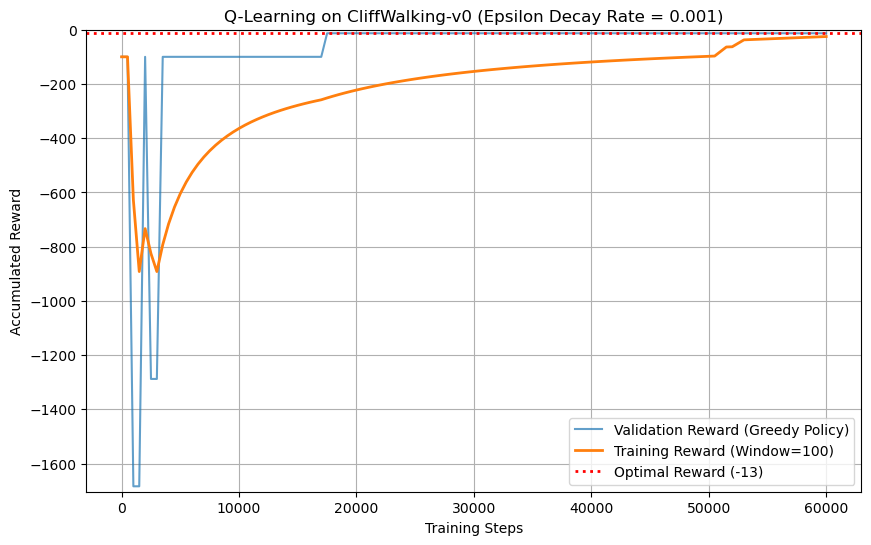

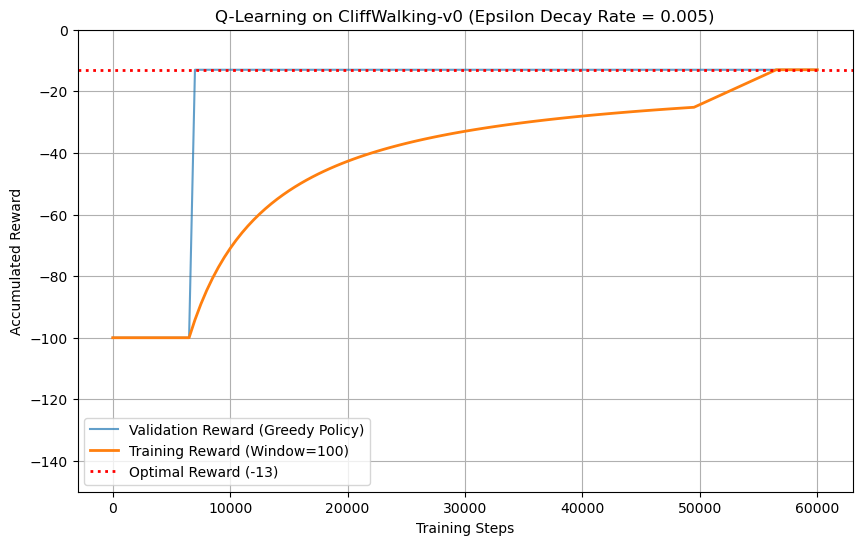

In [19]:
for decay_rate in epsilon_decay_rates:
    steps, validation_rewards, training_rewards = results[decay_rate]

    plt.figure(figsize=(10, 6)) # Create a new figure for each plot
    plt.plot(steps, validation_rewards, label="Validation Reward (Greedy Policy)", alpha=0.7)
    plt.plot(steps, training_rewards, label=f"Training Reward (Window={AVG_WINDOW})", linestyle='-', linewidth=2)
    
    plt.xlabel("Training Steps")
    plt.ylabel("Accumulated Reward")
    plt.title(f"Q-Learning on CliffWalking-v0 (Epsilon Decay Rate = {decay_rate})")
    plt.axhline(y=-13, color='r', linestyle=':', linewidth=2, label="Optimal Reward (-13)")
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=min(-150, np.nanmin(validation_rewards)-20 if len(validation_rewards)>0 and not all(np.isnan(validation_rewards)) else -150) , top=max(0, np.nanmax(validation_rewards)+5 if len(validation_rewards)>0 and not all(np.isnan(validation_rewards)) else 0)) # Adjust y-limits for better visualization
    plt.show()

### Agent Performance Demonstration

In [20]:
print("Learned Q-table snippet (first 5 states):")
print(learned_Q[:5, :])

print("\nTesting learned policy for a few episodes:")
test_env = CustomCliffWalkingEnv()
for i in range(3):
    state, _ = test_env.reset()
    test_env.render()
    episode_reward = 0
    done = False
    truncated = False
    print(f"\nEvaluation Episode {i+1}:")
    for step_num in range(MAX_STEPS_PER_EVAL_EPISODE):
        action = np.argmax(learned_Q[state, :])
        actions_map = {0: "Up", 1: "Right", 2: "Down", 3: "Left"}
        print(f"State: {state}, Action: {actions_map[action]} (Q-values: {learned_Q[state,:]})")
        next_state, reward, done, truncated, _ = test_env.step(action)
        episode_reward += reward
        state = next_state
        test_env.render()
        if done or truncated:
            break
    print(f"Episode {i+1} finished. Accumulated Reward: {episode_reward}. Steps: {step_num+1}")
test_env.close()

Learned Q-table snippet (first 5 states):
[[-13.81715786 -13.1220816  -13.12171831 -13.62049541]
 [-12.51905058 -12.24755814 -12.24770989 -13.62384935]
 [-11.5136598  -11.36134908 -11.36137733 -13.09437489]
 [-11.35978494 -10.46613862 -10.46615102 -12.23130814]
 [-10.46430056  -9.56177425  -9.56177945 -11.36034495]]

Testing learned policy for a few episodes:

Custom Cliff Walking Environment:
. . . . . . . . . . . .
. . . . . . . . . . . .
. . . . . . . . . . . .
A C C C C C C C C C C G
-----------------------

Evaluation Episode 1:
State: 36, Action: Up (Q-values: [ -12.2478977  -112.12541872  -13.12541872  -13.12541872])

Custom Cliff Walking Environment:
. . . . . . . . . . . .
. . . . . . . . . . . .
A . . . . . . . . . . .
S C C C C C C C C C C G
-----------------------
State: 24, Action: Right (Q-values: [-13.12541872 -11.36151283 -13.12541872 -12.2478977 ])

Custom Cliff Walking Environment:
. . . . . . . . . . . .
. . . . . . . . . . . .
. A . . . . . . . . . .
S C C C C C C C

### Results Analysis
The learning curve and visualized policy demonstrate that:
- The agent successfully learns to navigate safely to the goal.
- The learned policy avoids the cliff by taking a path above it.
- The final performance achieves near-optimal rewards.
- The custom environment correctly replicates the standard Cliff Walking environment from Gymnasium.

### Training Results

The Q-learning algorithm was applied to the custom environment with two epsilon decay rates (0.001 and 0.005), similar to Task 1:

1. **With ε-decay = 0.001**:
   - Achieved optimal policy (-13 reward) around step 17,500
   - Smoothed evaluation reward approached optimal value gradually
   - Final average reward: -25.18 at 60,000 steps
   - Required 905 training episodes

2. **With ε-decay = 0.005**:
   - Achieved optimal policy (-13 reward) by step 7,500
   - Converged to consistent optimal performance much faster
   - Final average reward: -13.00 at 60,000 steps (perfect optimal policy)
   - Required 3,491 training episodes

### Policy Verification

The final learned policy demonstrates intelligent behavior:

1. **Learned Path**: The agent correctly learns to navigate up from the start position, traverse the top row, and then move down to the goal.
2. **Cliff Avoidance**: Q-values for actions leading to the cliff show strong negative values (around -112), indicating the agent has learned to avoid the cliff.
3. **Optimal Trajectory**: All test episodes achieved the theoretical optimal reward of -13, corresponding to the minimum number of steps needed to reach the goal.

This custom environment implementation provides an excellent platform for experimenting with different reinforcement learning algorithms and parameters, while maintaining compatibility with the Gymnasium ecosystem.